In [326]:
import geopandas 
from shapely.geometry import Polygon
from shapely.geometry import Point
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt
import matplotlib.cm as cm # for colors
import matplotlib.colors as colors # for more colors

## Load project data

Create dictionary to use for loading data and later to access geodataframes through loops for plotting and processing

In [335]:
data={
    'ms4s': {'path':'../data/HudsonEstuary/ms4_outfalls/MS4Outfalls_study_area.shp'},
    'csos':{'path': '../data/HudsonEstuary/CSOs/CSOs_studyarea.shp'},
    'bl':{'path': '../data/HudsonEstuary/boatlaunches/boatlaunches_NJ_NY.shp'},
    'waterbodies':{'path':'../data/HudsonEstuary/waterbody_regions/waterbodies.shp'},
    'ba':{'path':'../data/HudsonEstuary/boundingarea/boundingarea.shp'},
    'sa':{'path':'../data/HudsonEstuary/study_area/study_area.shp'},
    'watershape':{'path':'../data/HudsonEstuary/region_water_shape/region_water_shape.shp'},
    'beaches':{'path':'../data/HudsonEstuary/Beaches/beaches_merge_1.shp'},
    'sa_poly':{'path':'../data/HudsonEstuary/study_area/study_area_polygon.shp'},
    'stations':{'path':'../data/HudsonEstuary/sampling_stations_used_for_analysis/sampling_stations_used_for_analysis.shp'}
}

Load project shapefiles as geodataframes from dictionary

In [336]:
for k, v in data.items():
    gdf = geopandas.read_file(data[k]['path'])
    
    # two datasets have empty geometry rows that need to be removed
    if k =='stations':
         gdf = gdf[gdf['Station'] != '466']
    if k == 'sa':
         gdf = gdf.drop(1)
            
    data[k]['gdf'] = gdf

# Put all project shapefiles into the same projection
### Find geodataframes with crs that needs updating and update crs
EPSG 2263 is used for this project.  
The loop to check and transform CRS to EPSG 2263 will break when it hits an empty geometry row in a shapefile. The load data loop above was changed to drop those rows before adding the shapefiles to memory. GDFs 'sa' and 'stations' had empty geometry rows. 

### 1. check to see that the empty geometry rows were dropped

In [337]:
data['sa']['gdf']

Id      Scope                                           geometry
0   0  Core Area  LINESTRING (1020071.698 324049.571, 1020088.64...
2   0  Core Area  LINESTRING (989917.358 50993.892, 986941.148 4...
3   0  Core Area  LINESTRING (979408.555 113294.555, 979595.923 ...

In [338]:
stations = data['stations']['gdf']
stations.tail(2)

Station              Descriptio   Latitude  Longitude field_5 Program  \
57      N7  Robbins Reef Buoy "28"  40.643833 -74.053833    None  NYCDEP   
58      N8             The Narrows  40.606167 -74.045500    None  NYCDEP   

             Waterbody  source                    geometry  
57  Upper New York Bay  NYCDEP  POINT (-74.05383 40.64383)  
58  Upper New York Bay  NYCDEP  POINT (-74.04550 40.60617)

### 2. list shapefiles/geodataframes and each crs

In [339]:
for k, v in data.items():
    crs = (data[k]['gdf']).crs

    print(k,":",crs)

ms4s : {'init': 'epsg:2263'}
csos : {'init': 'epsg:2263'}
bl : {'init': 'epsg:2263'}
waterbodies : {'init': 'epsg:2263'}
ba : {'init': 'epsg:2263'}
sa : {'init': 'epsg:2263'}
watershape : {'init': 'epsg:2263'}
beaches : {'init': 'epsg:2263'}
sa_poly : {'init': 'epsg:2263'}
stations : {'init': 'epsg:4326'}


### 3. Run code block to find geodataframes with crs that needs updating and update crs
also, save updated shapefiles to the processing folder

In [446]:
for k, v in data.items():
    gdf = data[k]['gdf']
    crs = gdf.crs

    if str(crs) != 'epsg:2263':       
        gdf.to_crs(epsg = 2263, inplace = True)
    print(k, crs)  # check that all were transformed to 2263
    
    gdf.to_file(f'../data/processing/{k}.shp')

ms4s {'init': 'epsg:2263', 'no_defs': True}
csos {'init': 'epsg:2263', 'no_defs': True}
bl {'init': 'epsg:2263', 'no_defs': True}
waterbodies {'init': 'epsg:2263', 'no_defs': True}
ba {'init': 'epsg:2263', 'no_defs': True}
sa {'init': 'epsg:2263', 'no_defs': True}
watershape {'init': 'epsg:2263', 'no_defs': True}
beaches {'init': 'epsg:2263', 'no_defs': True}
sa_poly {'init': 'epsg:2263', 'no_defs': True}
stations {'init': 'epsg:2263', 'no_defs': True}


## Name each gdf for plotting

In [341]:
ms4s = data['ms4s']['gdf']
csos = data['csos']['gdf']
bl = data['bl']['gdf']
waterbodies = data['waterbodies']['gdf']
ba = data['ba']['gdf']
sa = data['sa']['gdf']
watershape = data['watershape']['gdf']
beaches = data['beaches']['gdf']
sa_poly = data['sa_poly']['gdf']
stations = data['stations']['gdf']

## Loop over gdfs and plot each one separately


In [78]:
#!pip install descartes

To allow for additional styling in Illustrator, set matplotlib parameters below so that text exports as text rather than outlines. Also set font family here.

In [347]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.sans-serif'] = "Open Sans"

In [427]:
colors={
    'grey1': '#e7e6e0', 
    'grey2': '#C7C3BB',
    'grey3':'#B9B3AA',
    'grey4': '#56524A',
    'hab_g': '#93C15C',
    'wq_bl': '#3c89c3',
    'mt_p': '#A95A9B',
    'ce_or': '#fcb103',
    'cc_y': '#E3BE3A',
    'hep_r': '#fc5203'    
}

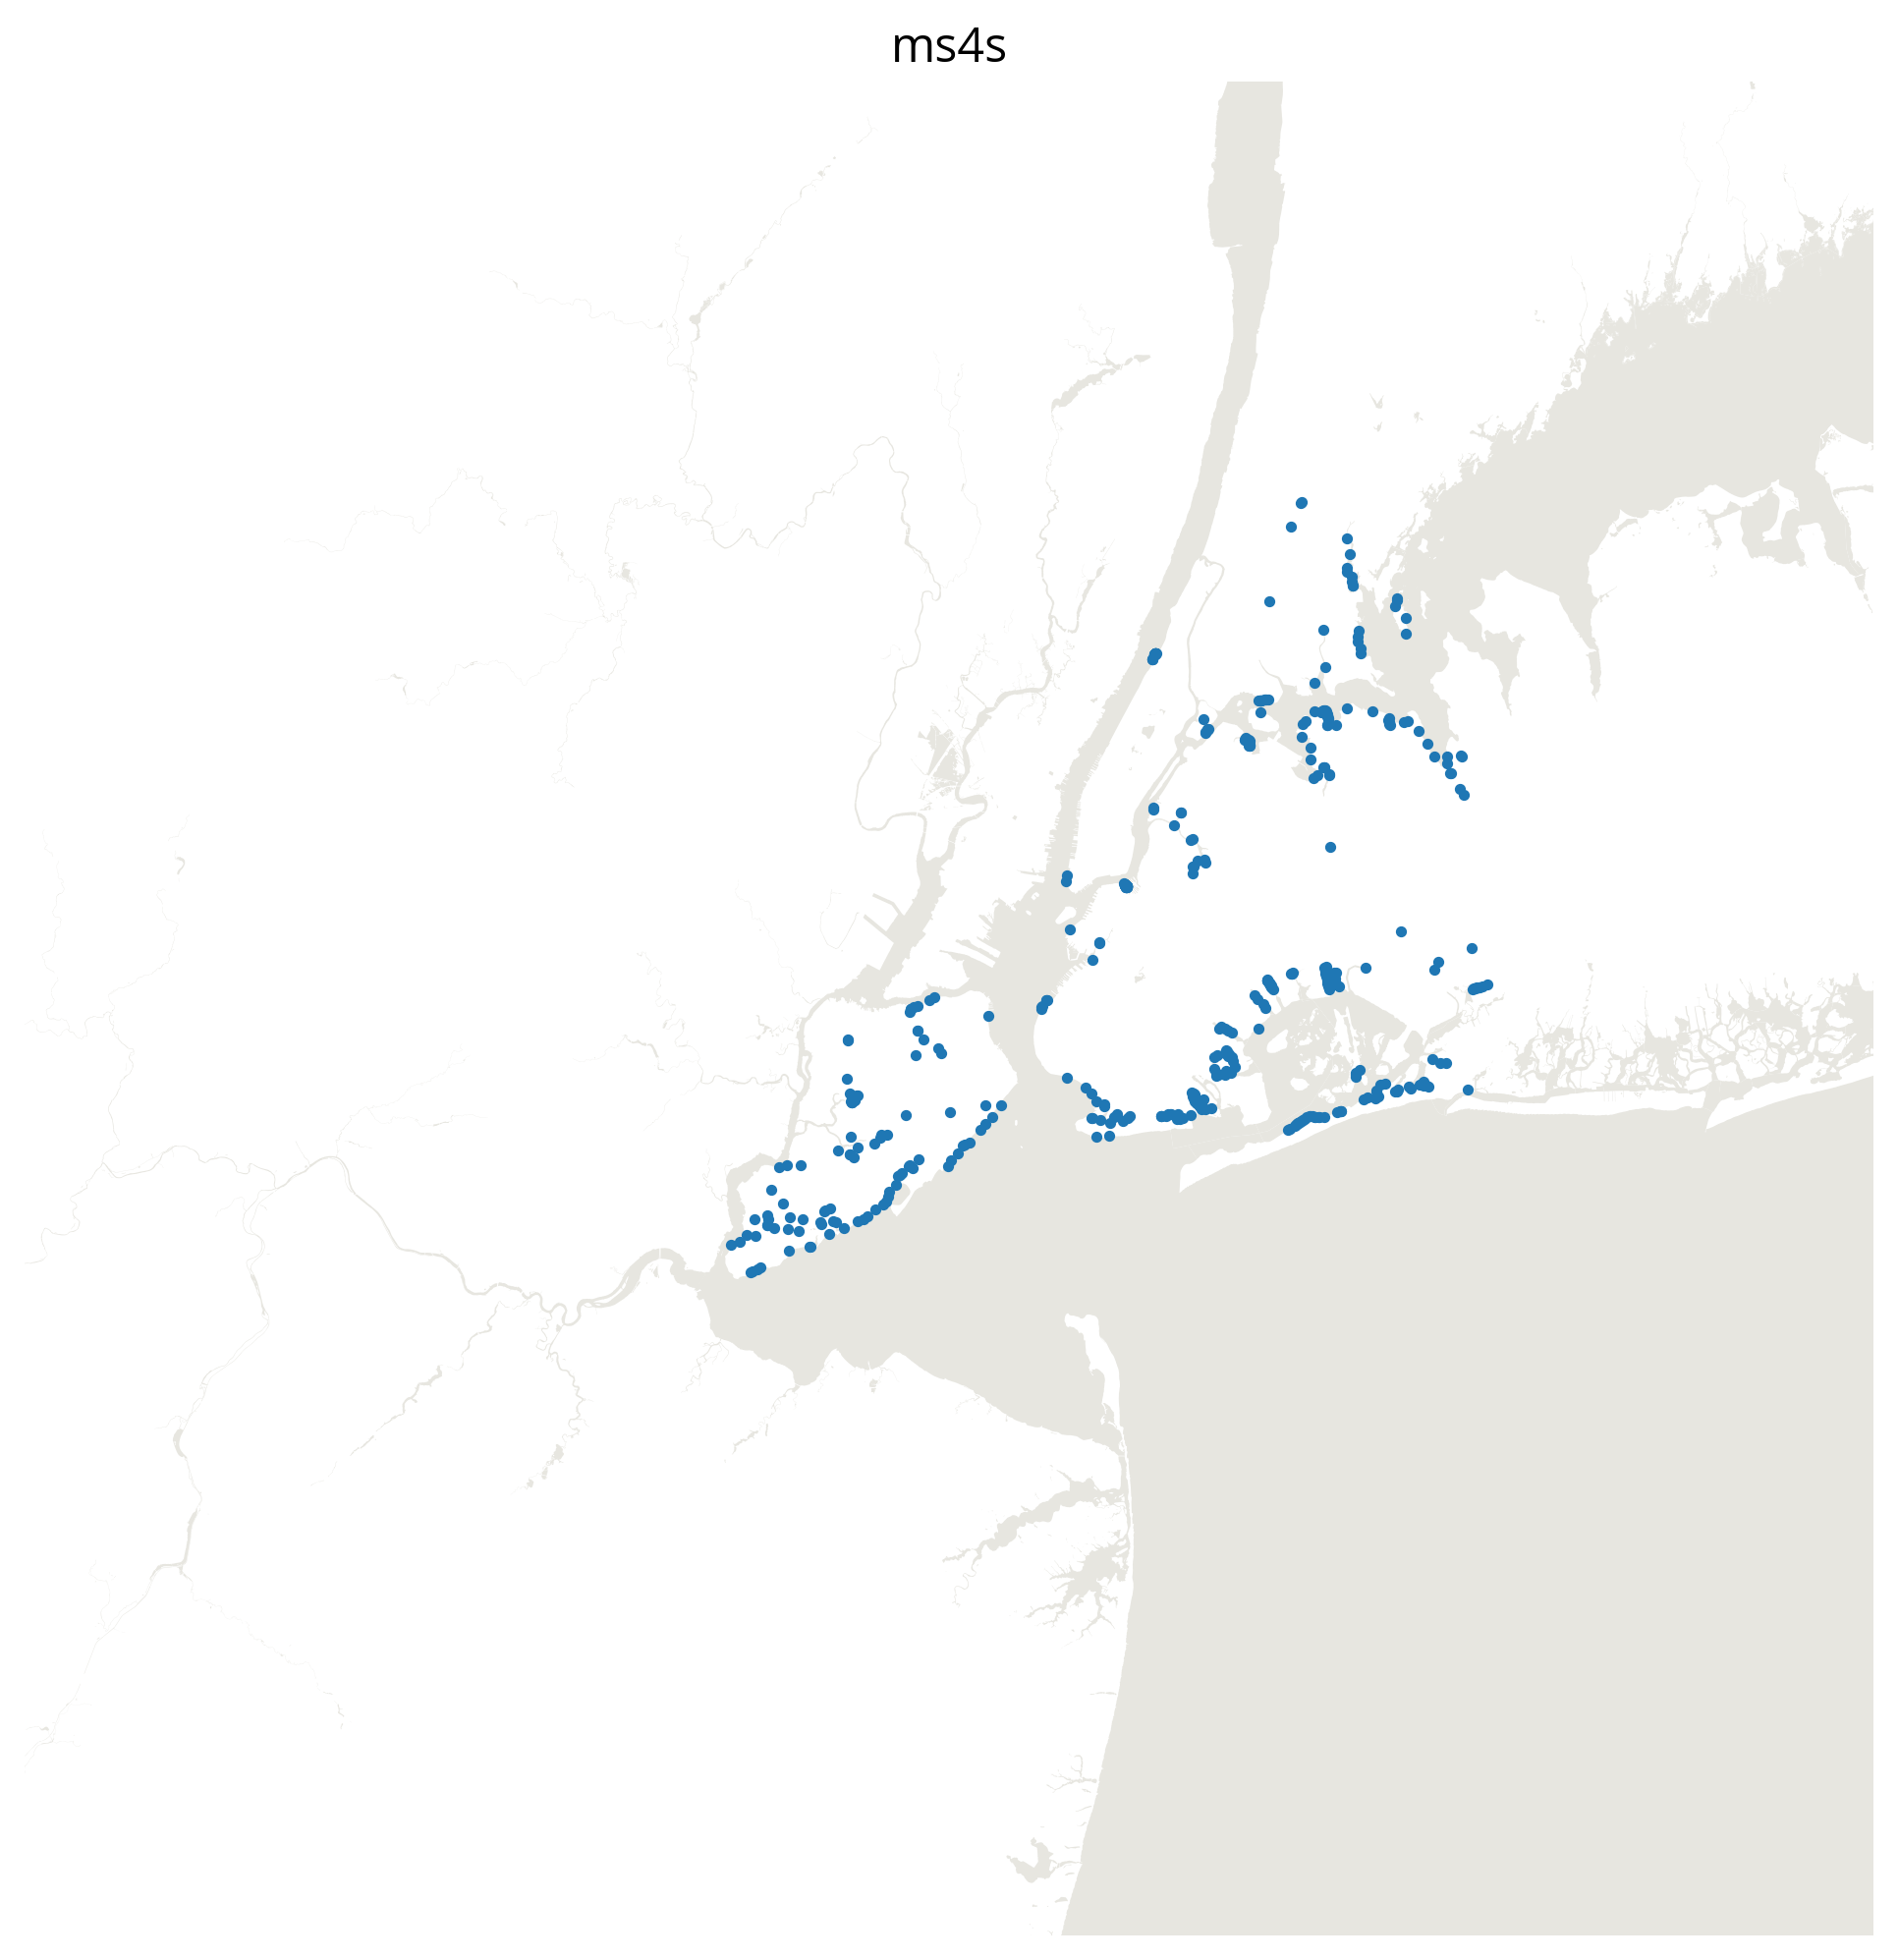

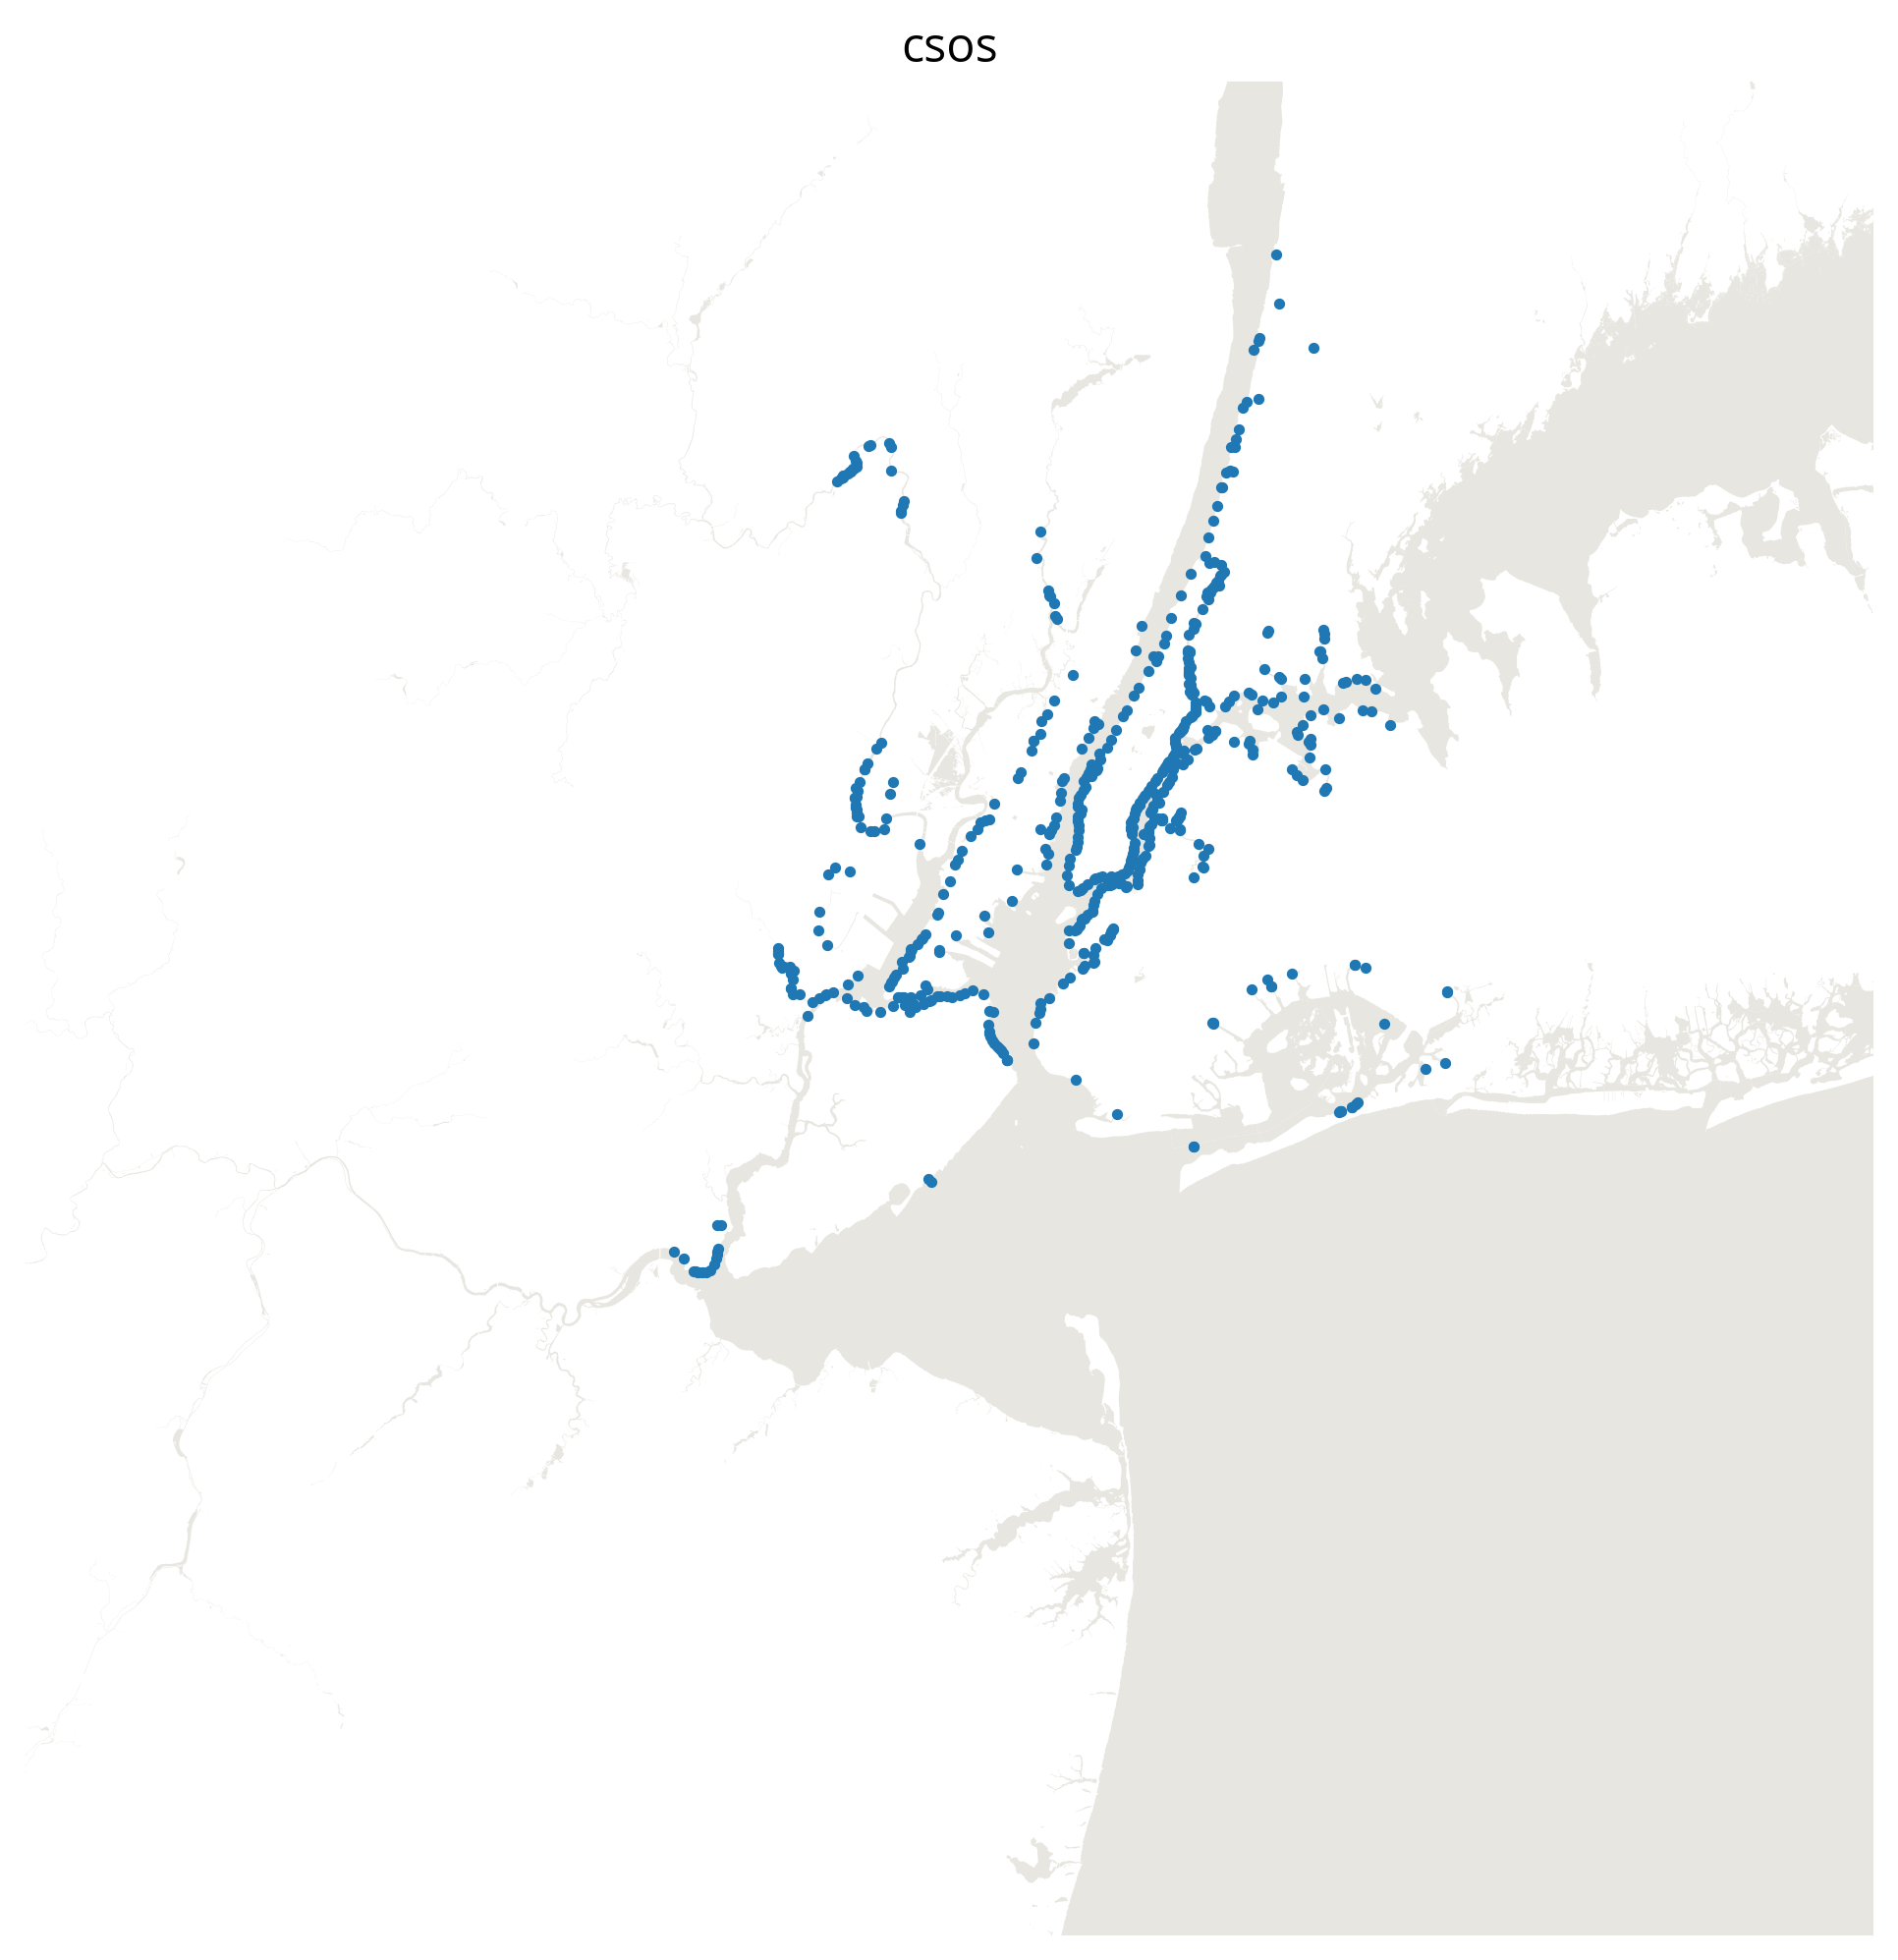

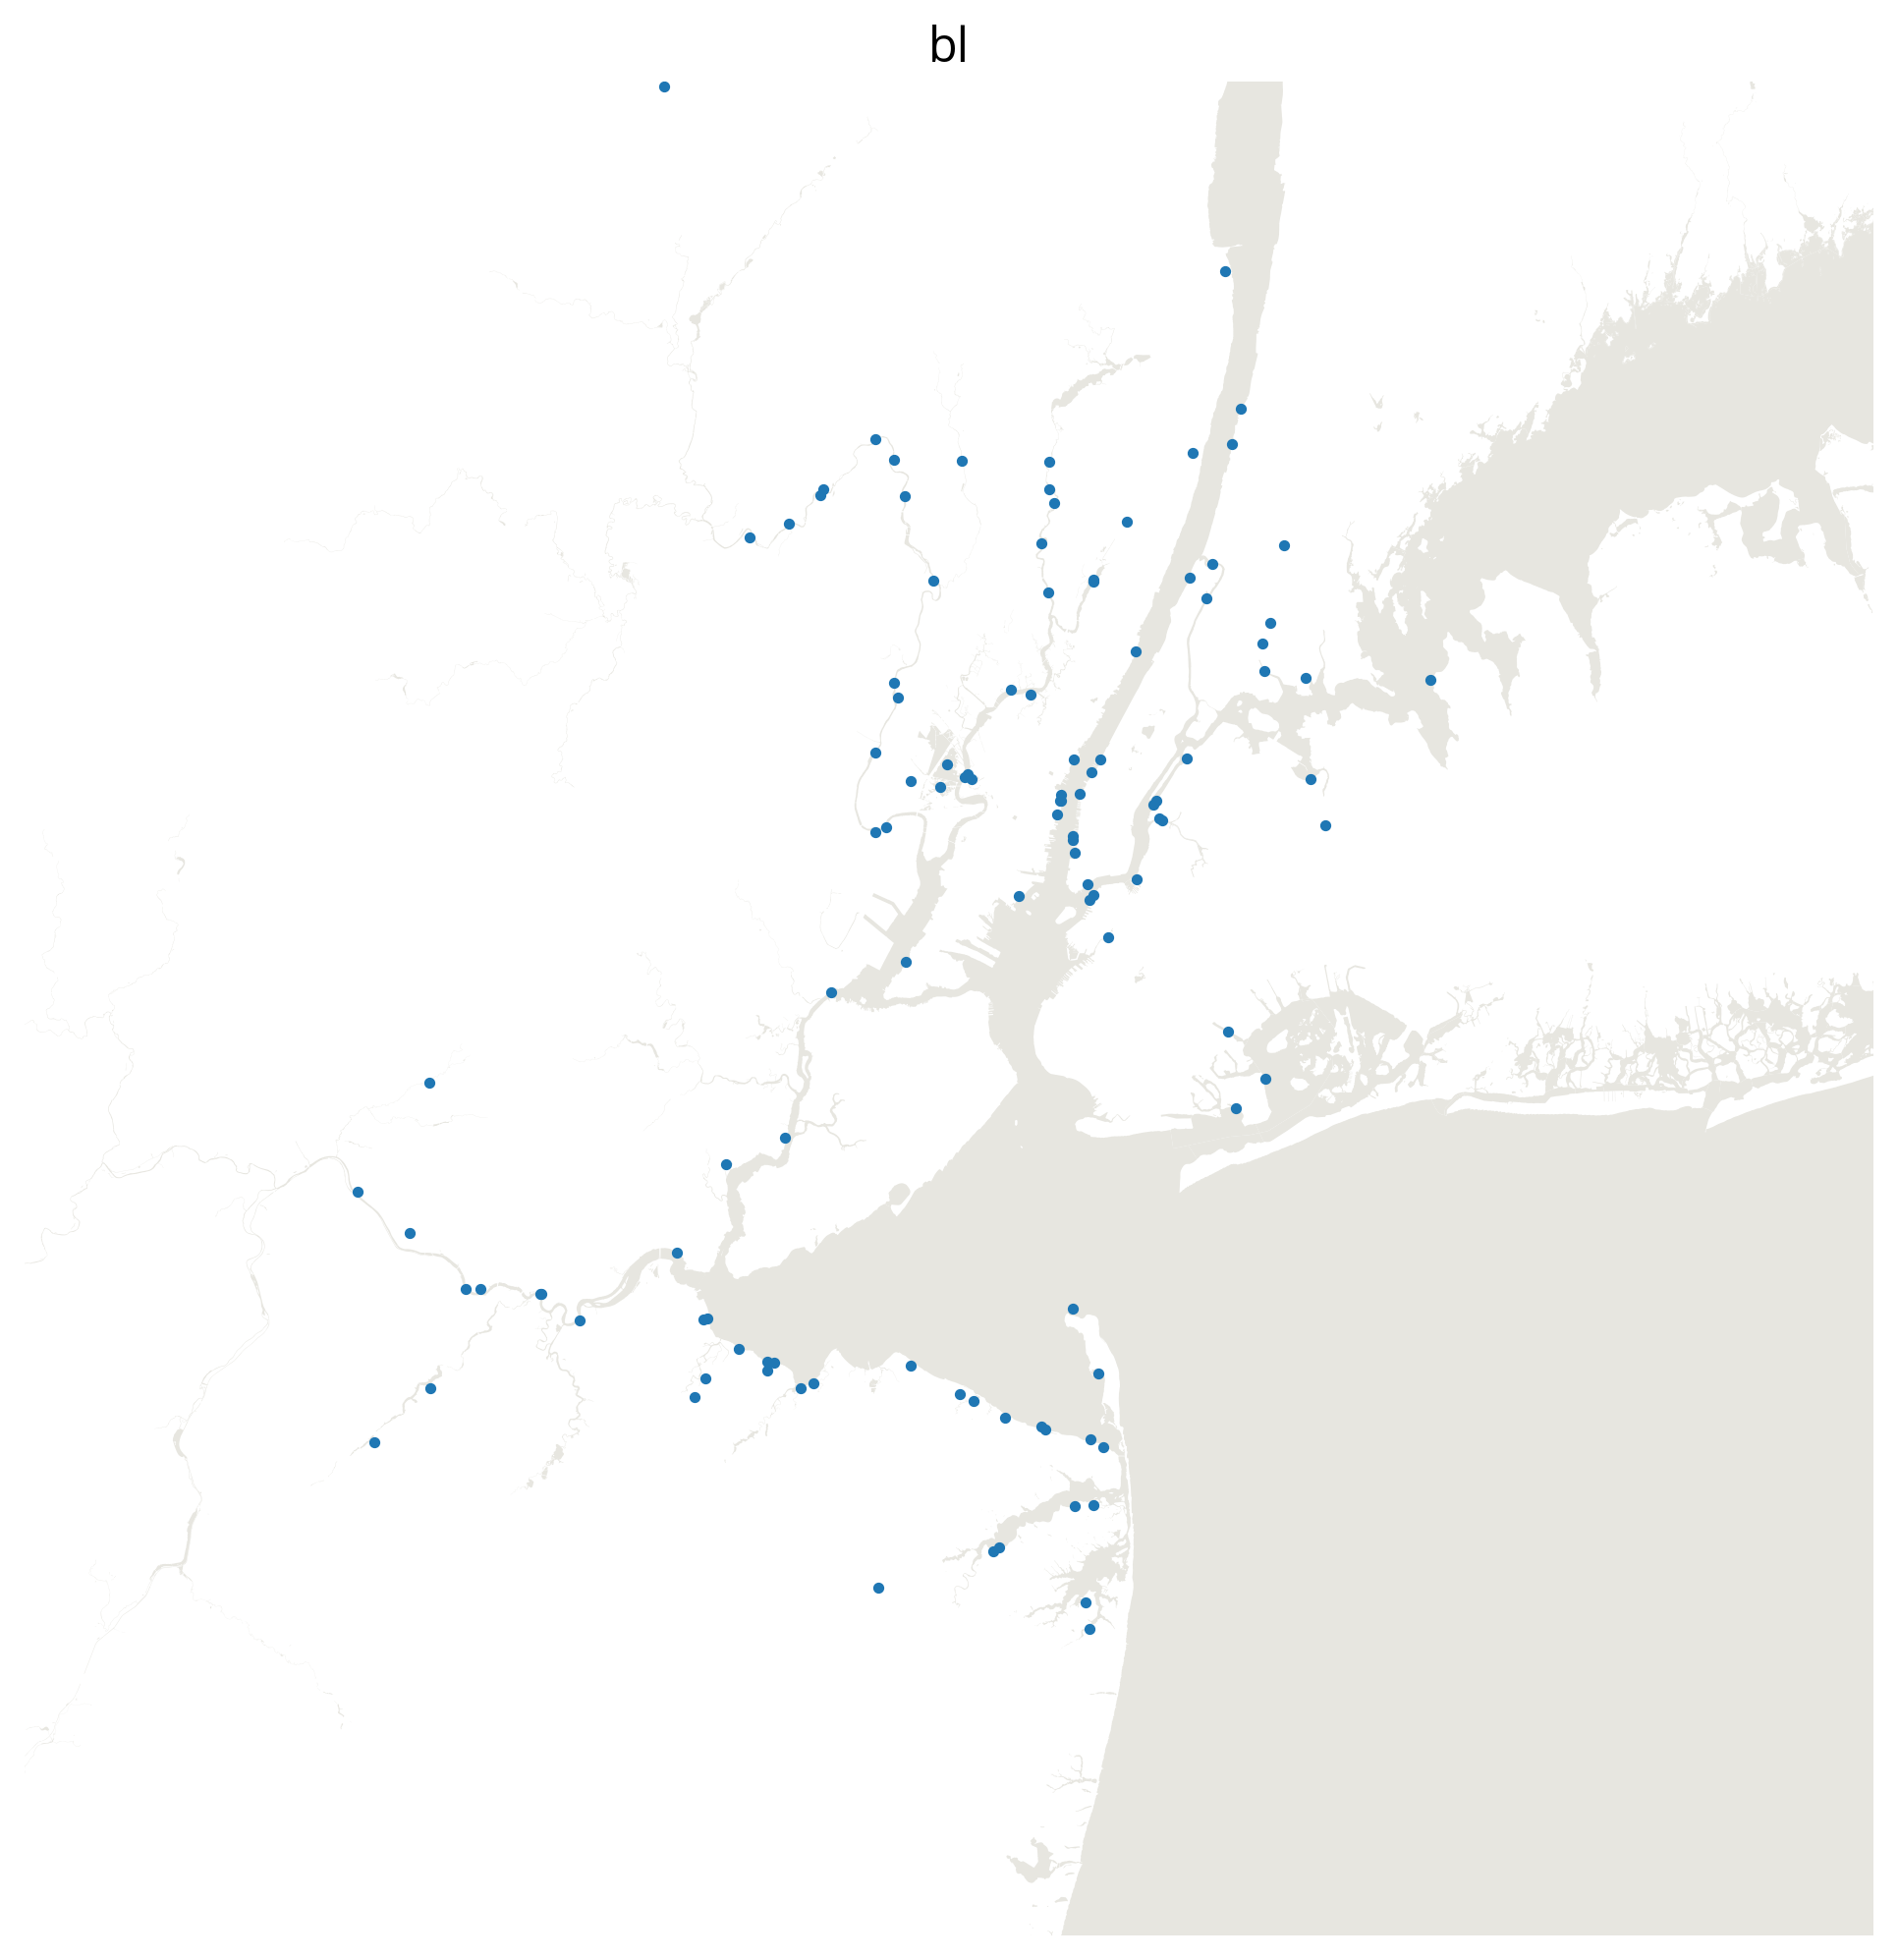

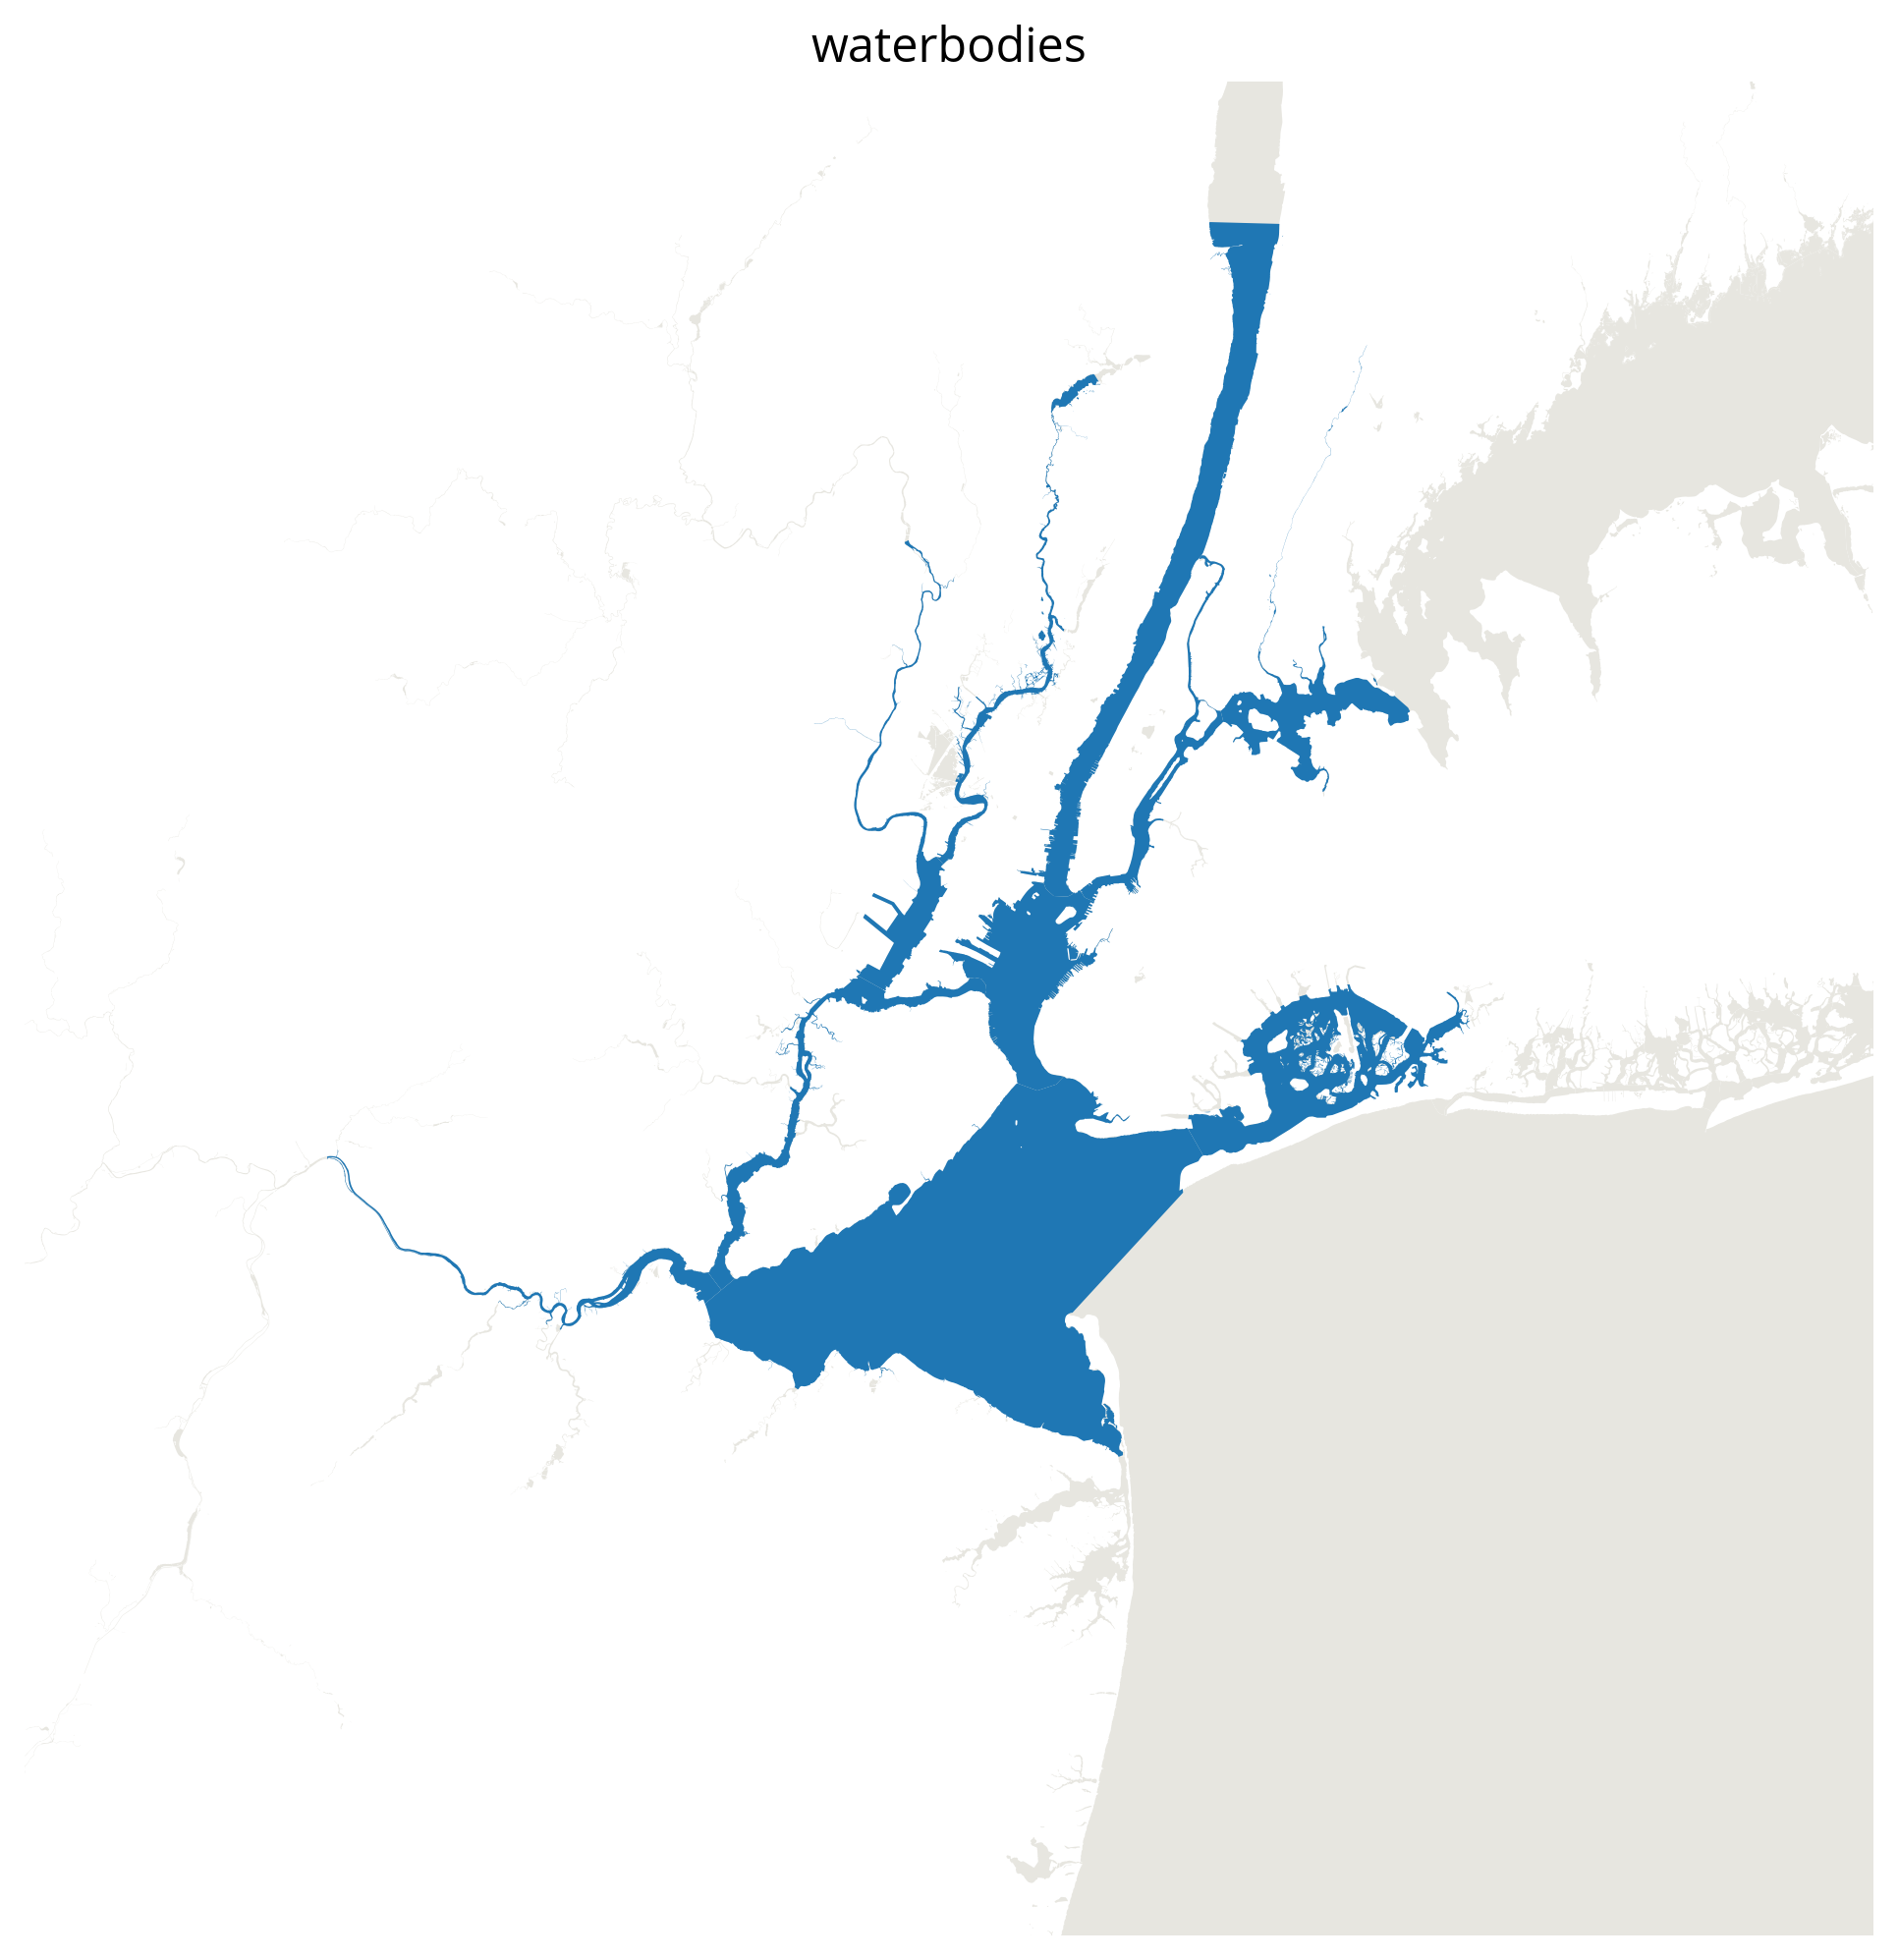

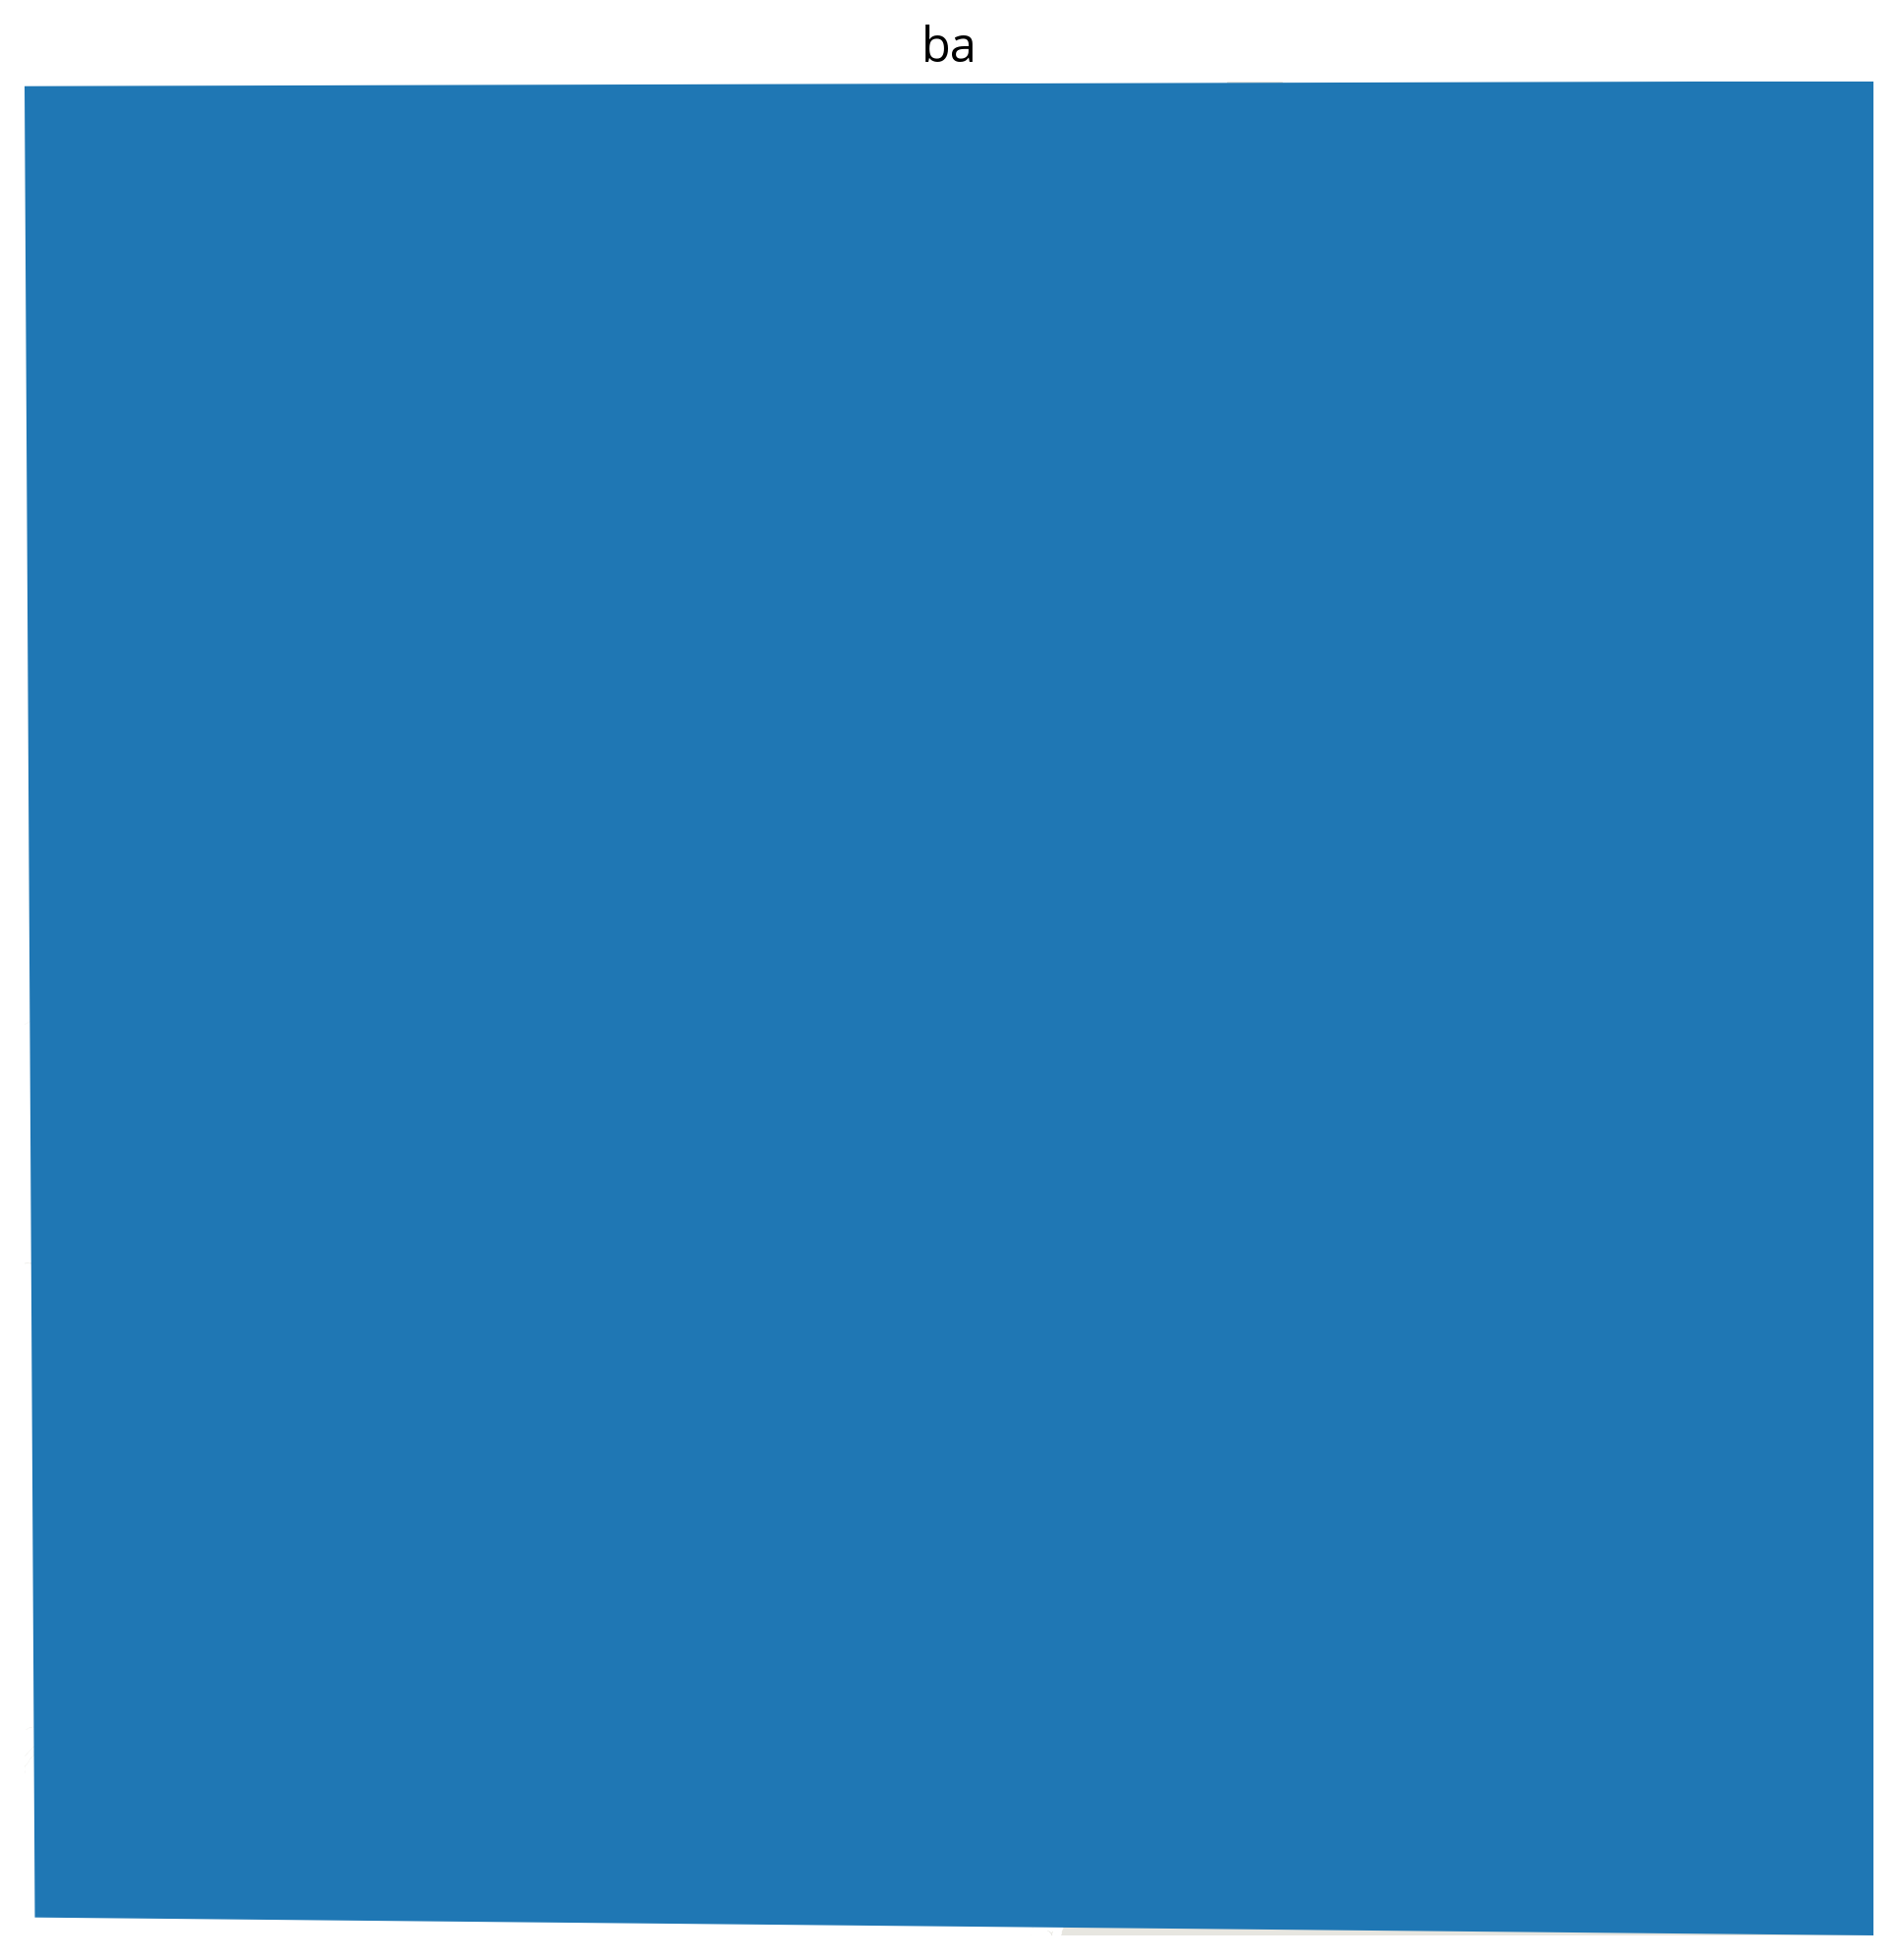

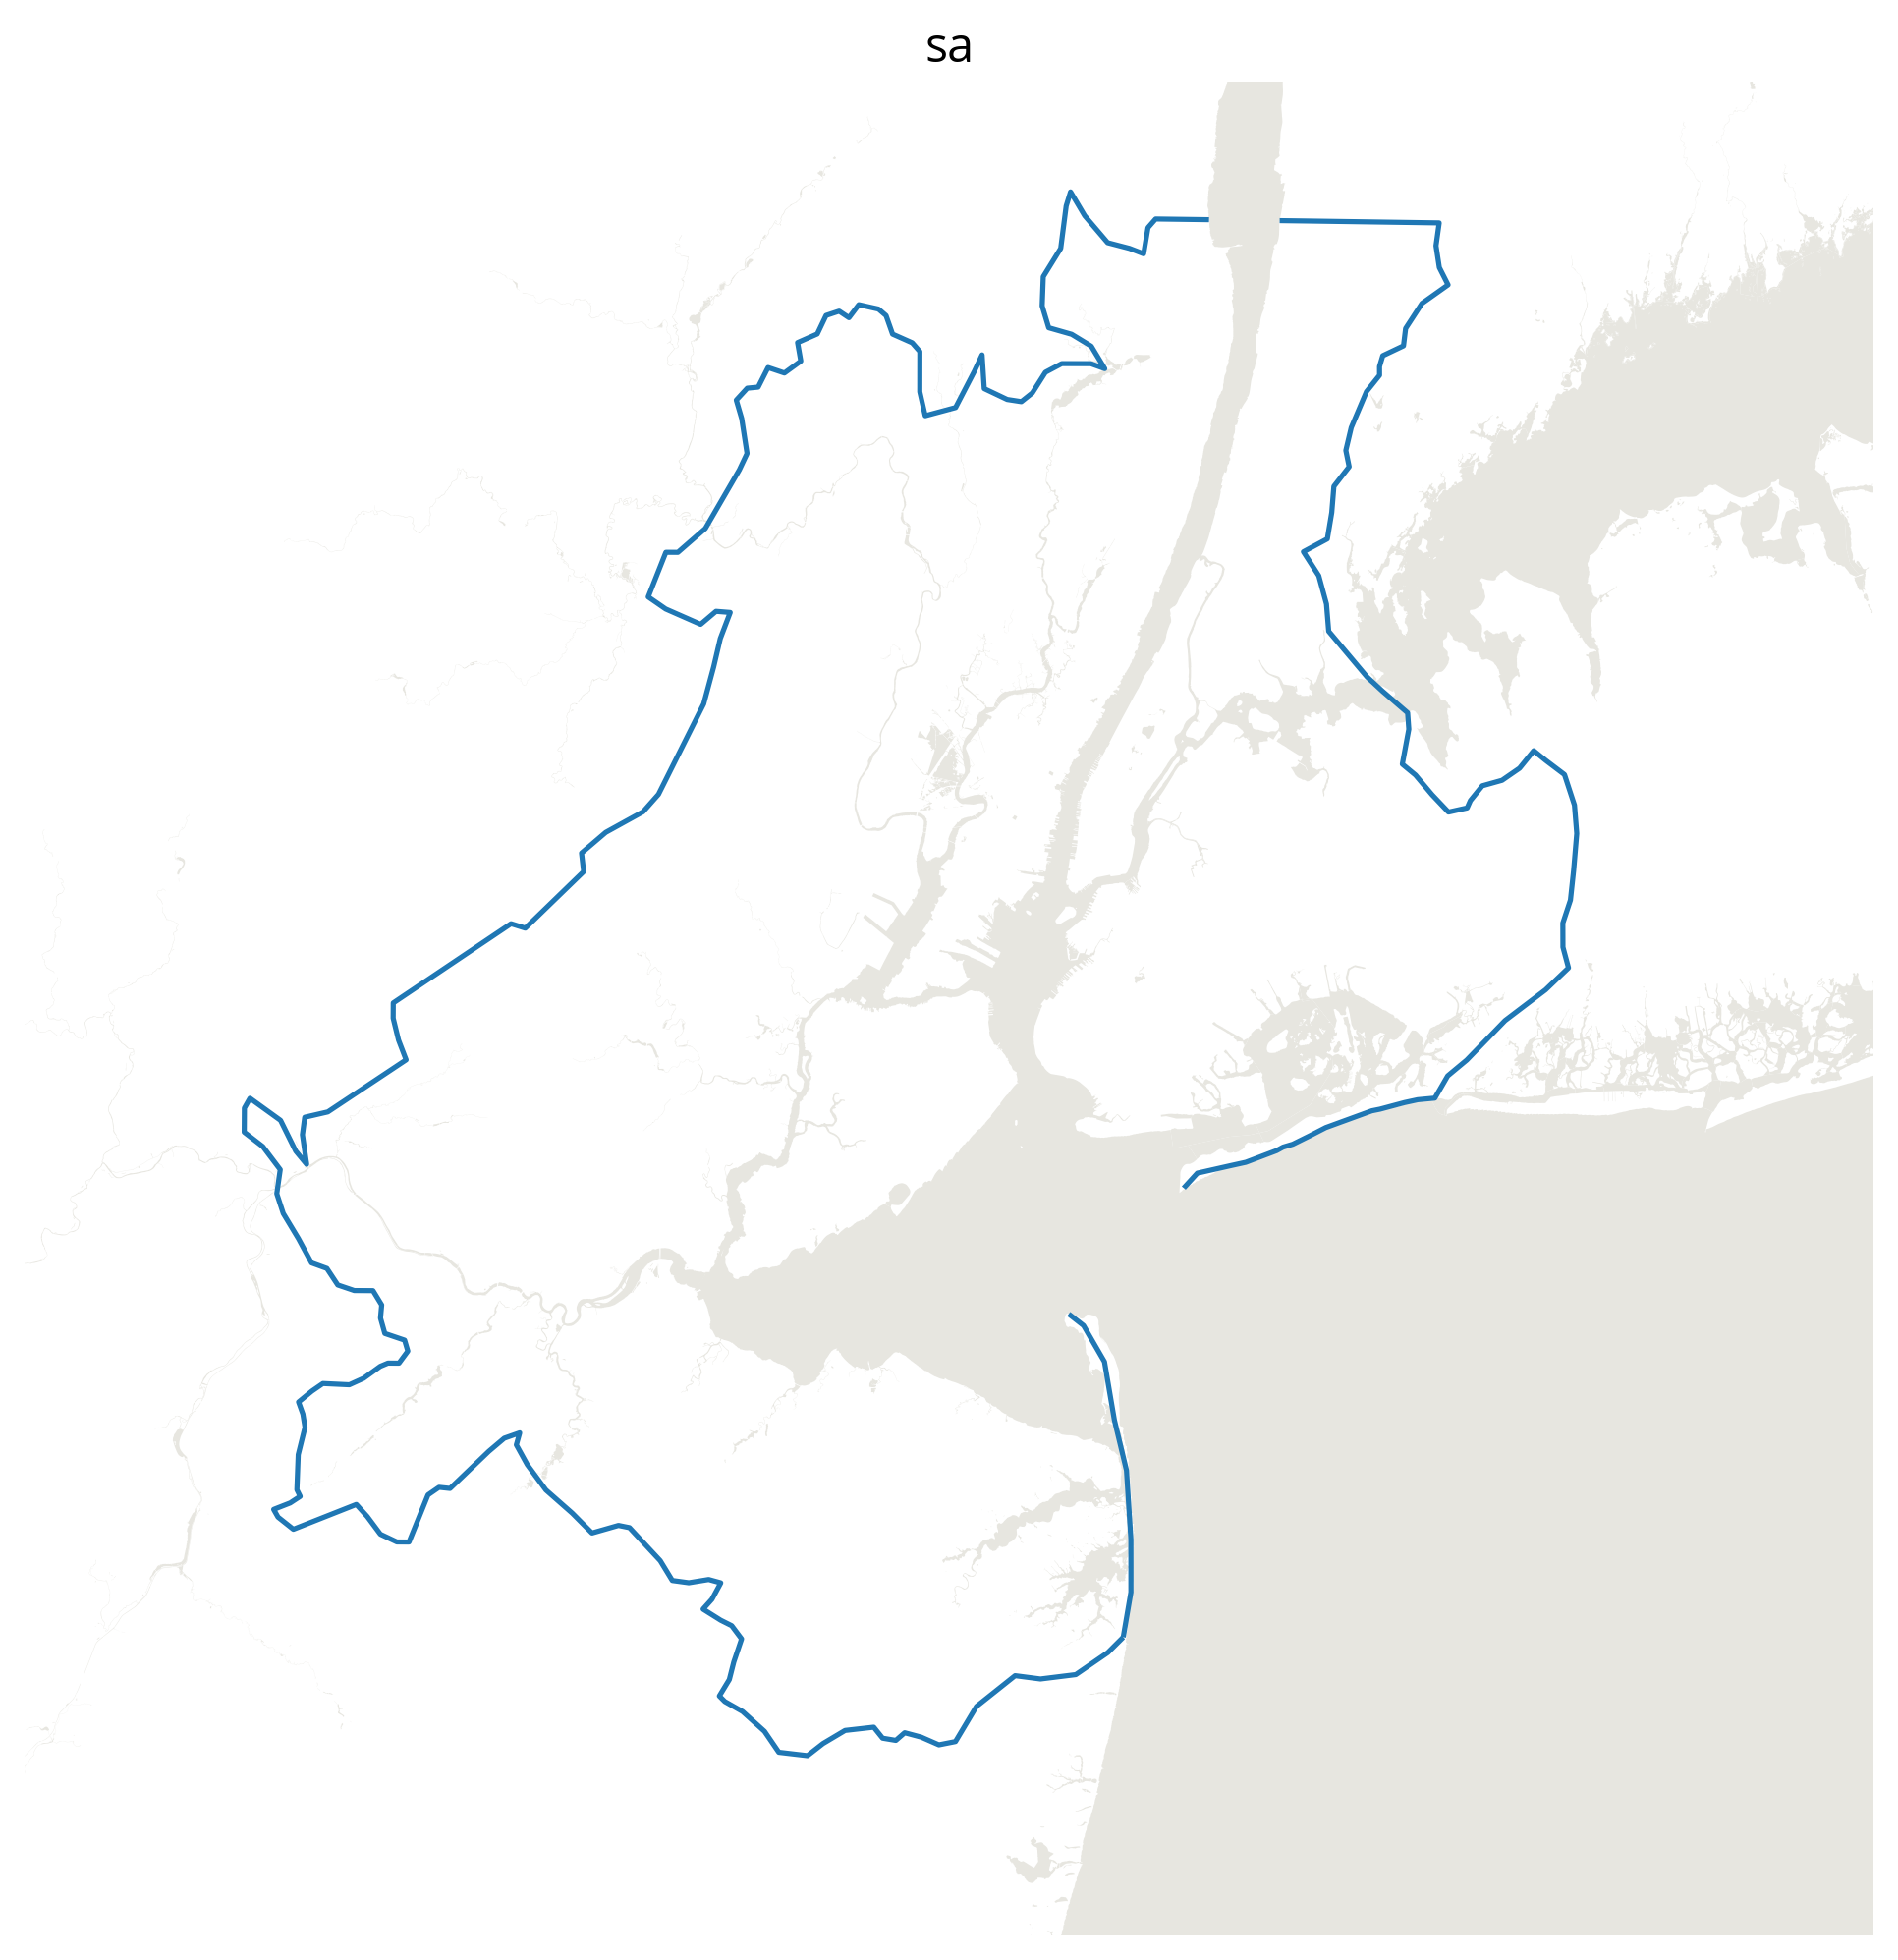

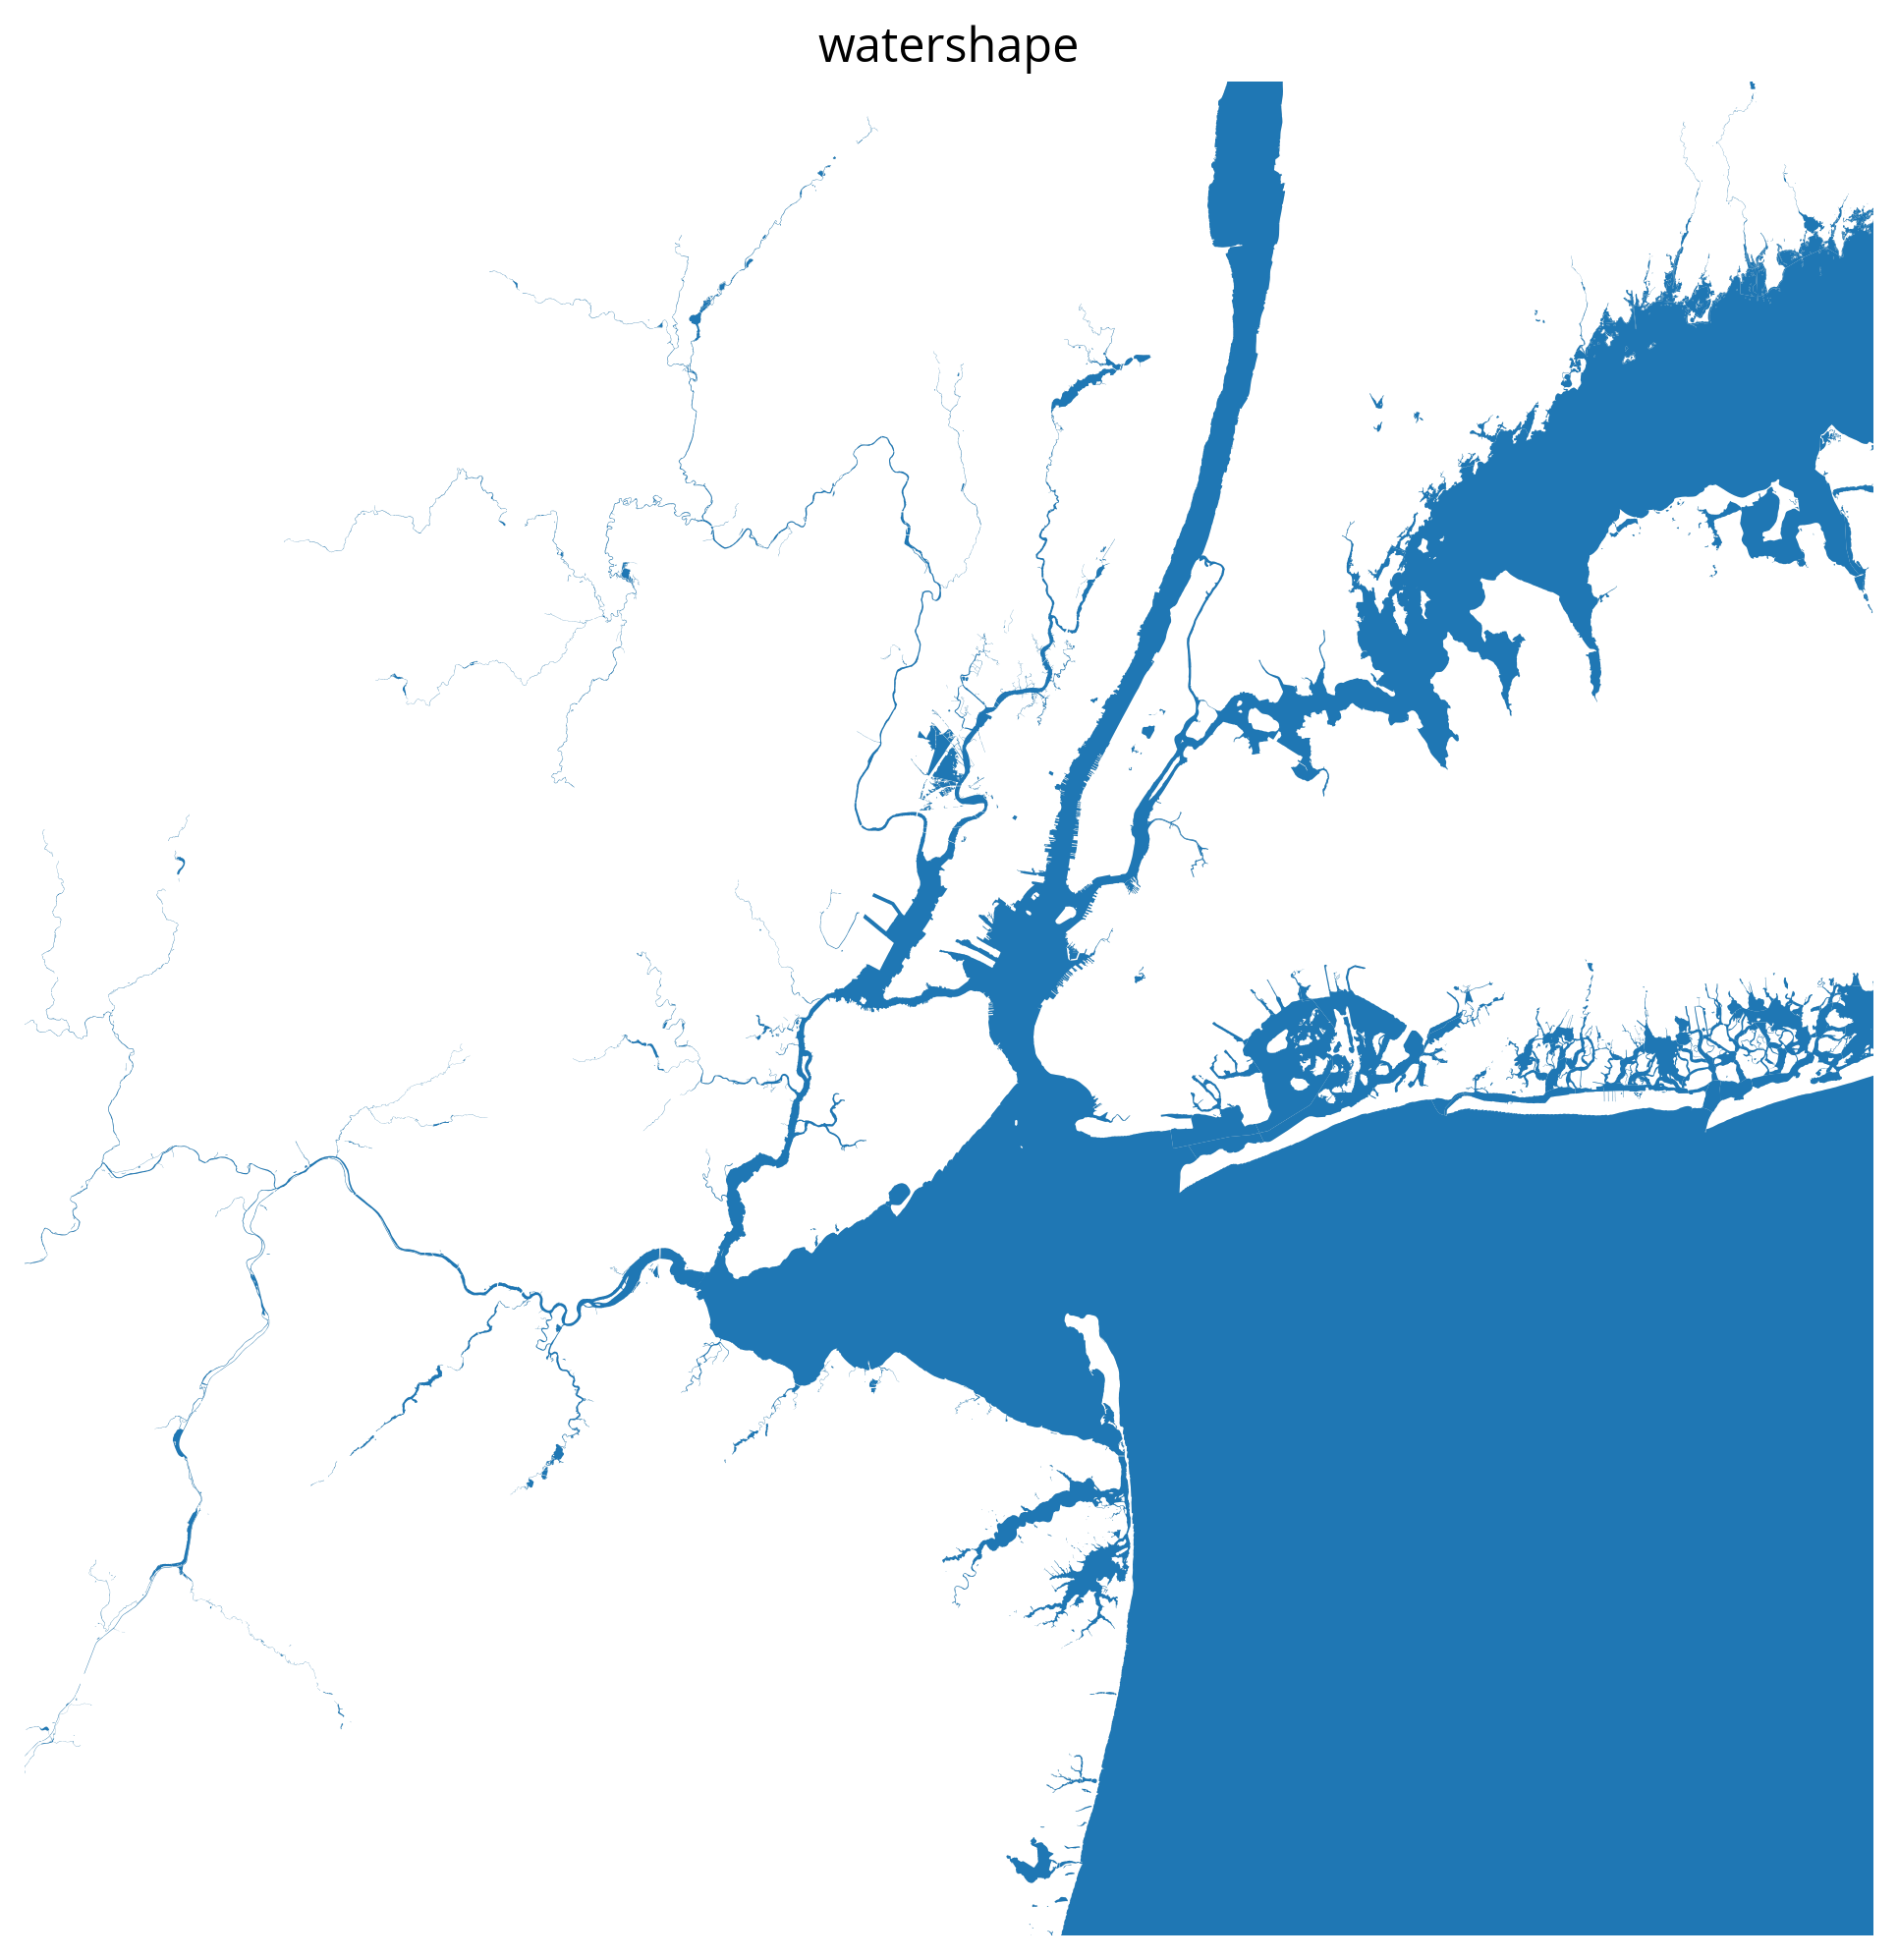

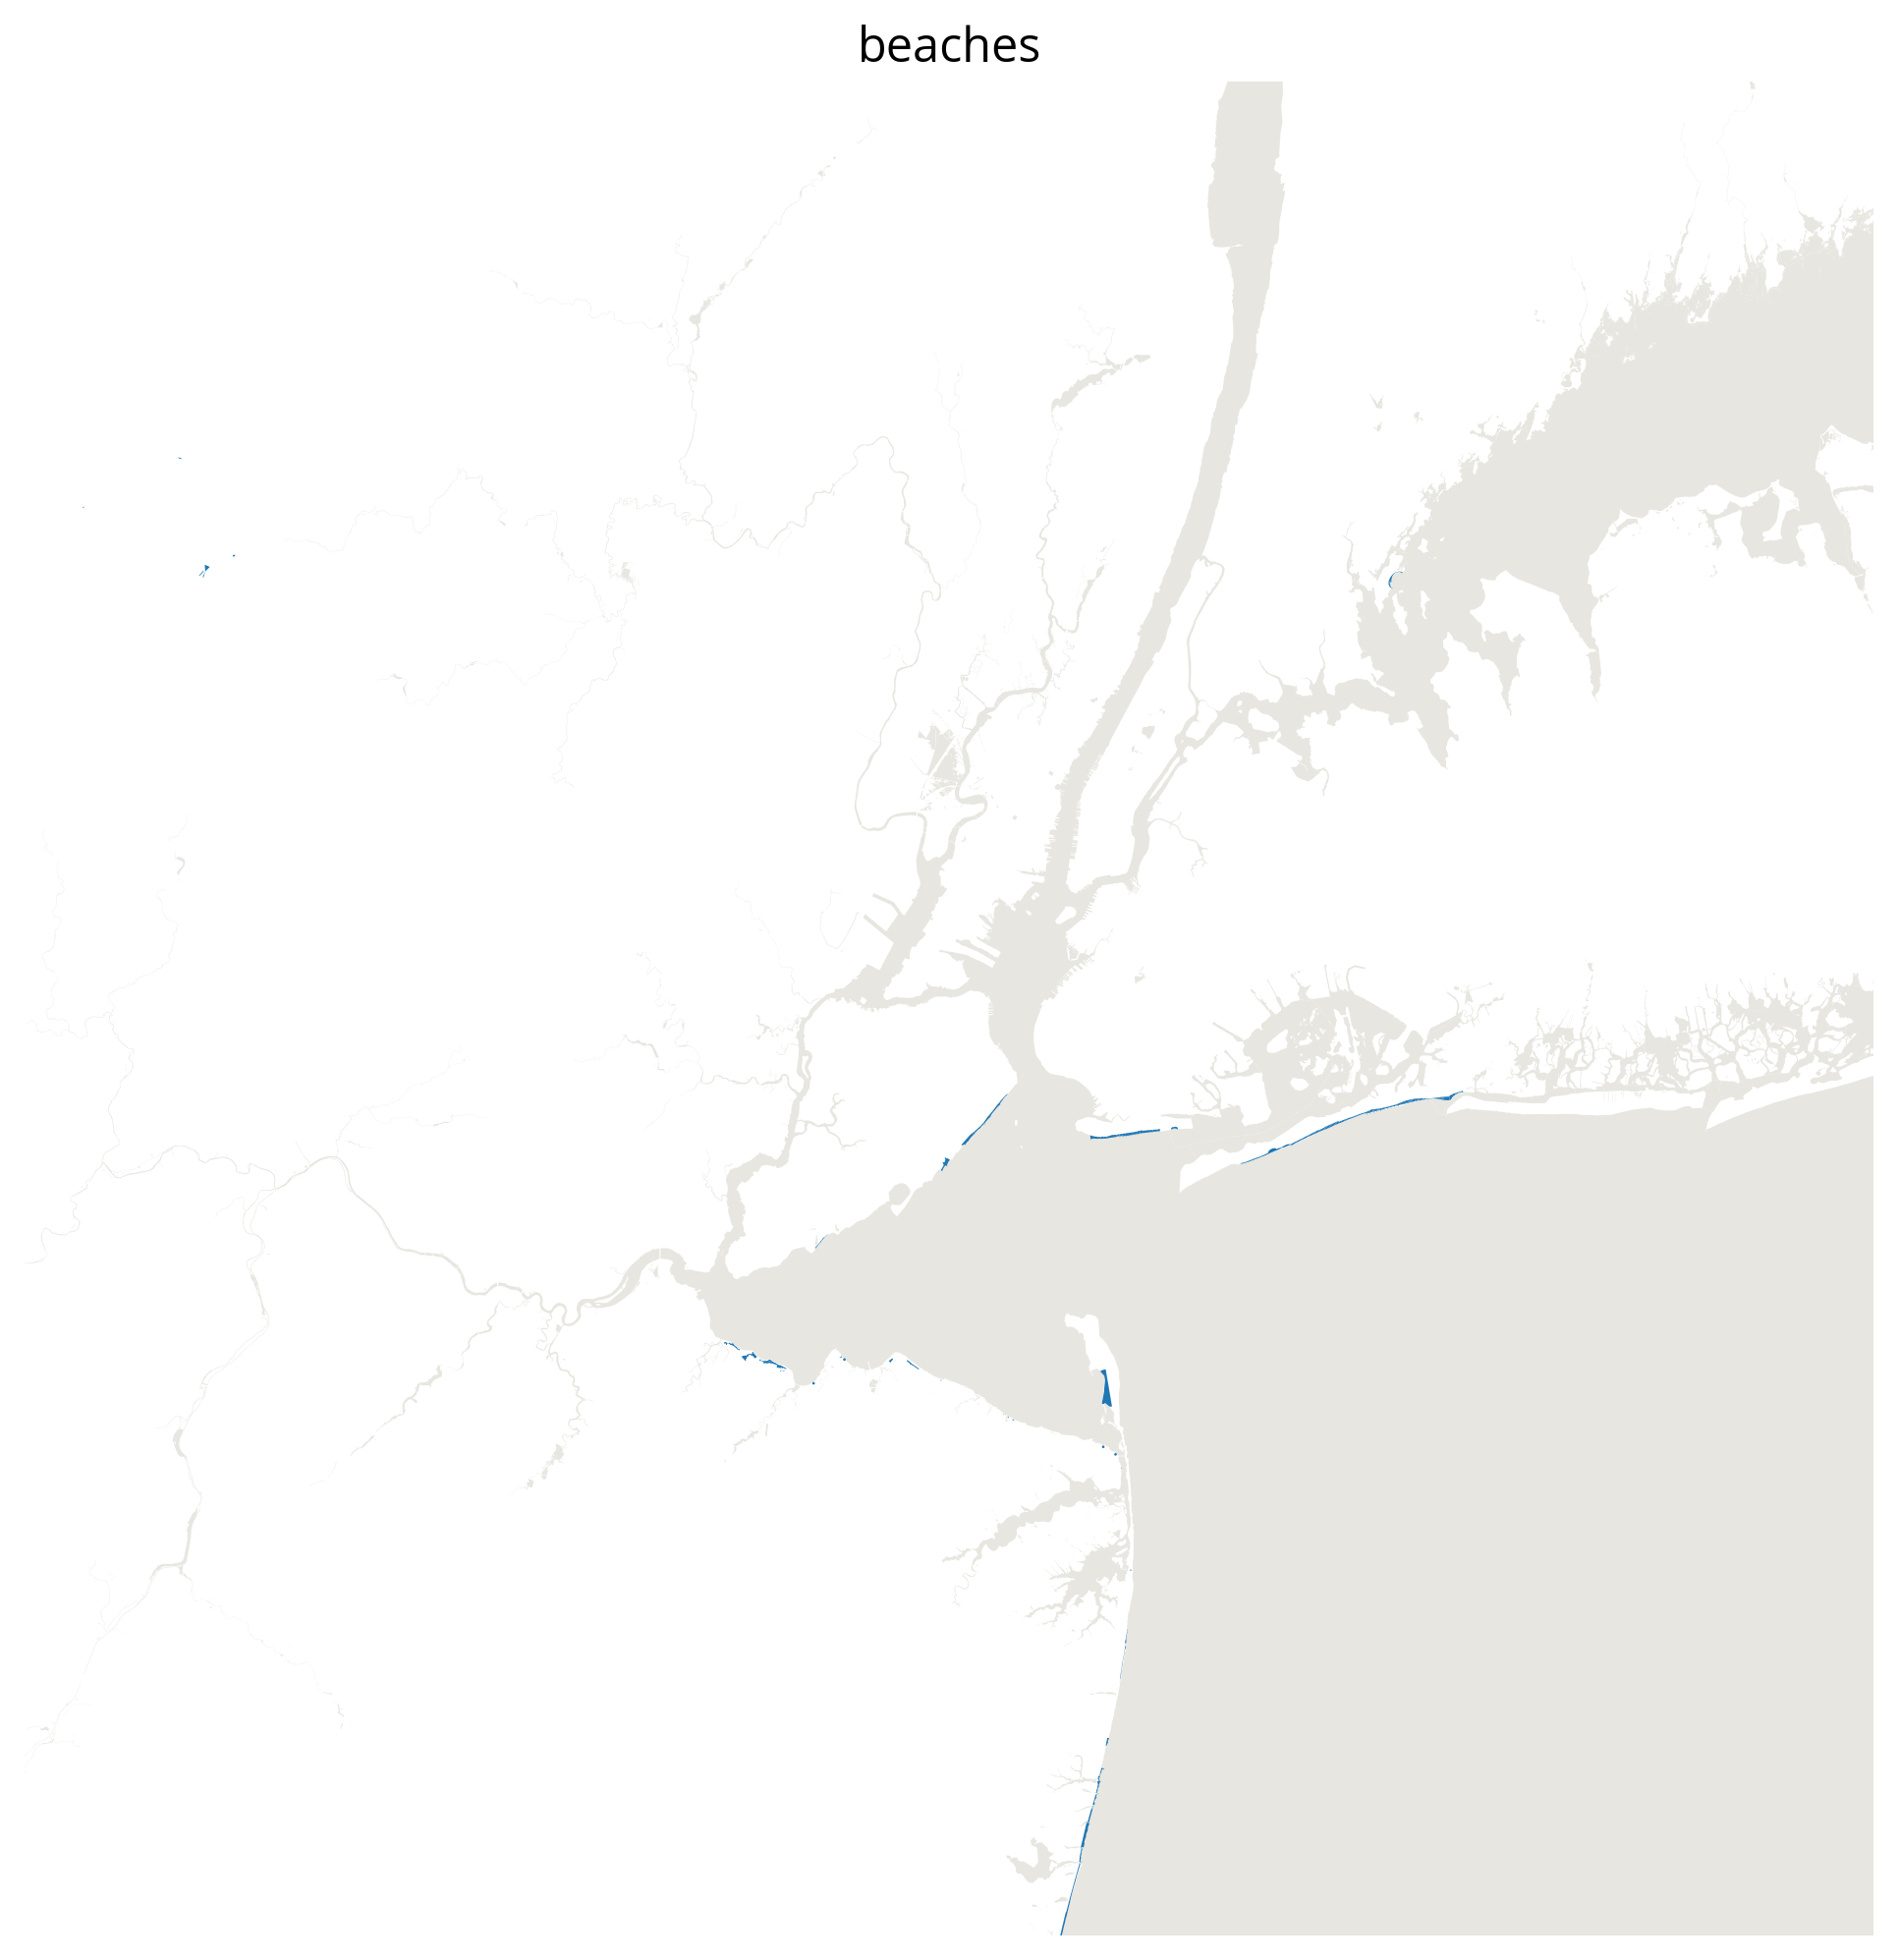

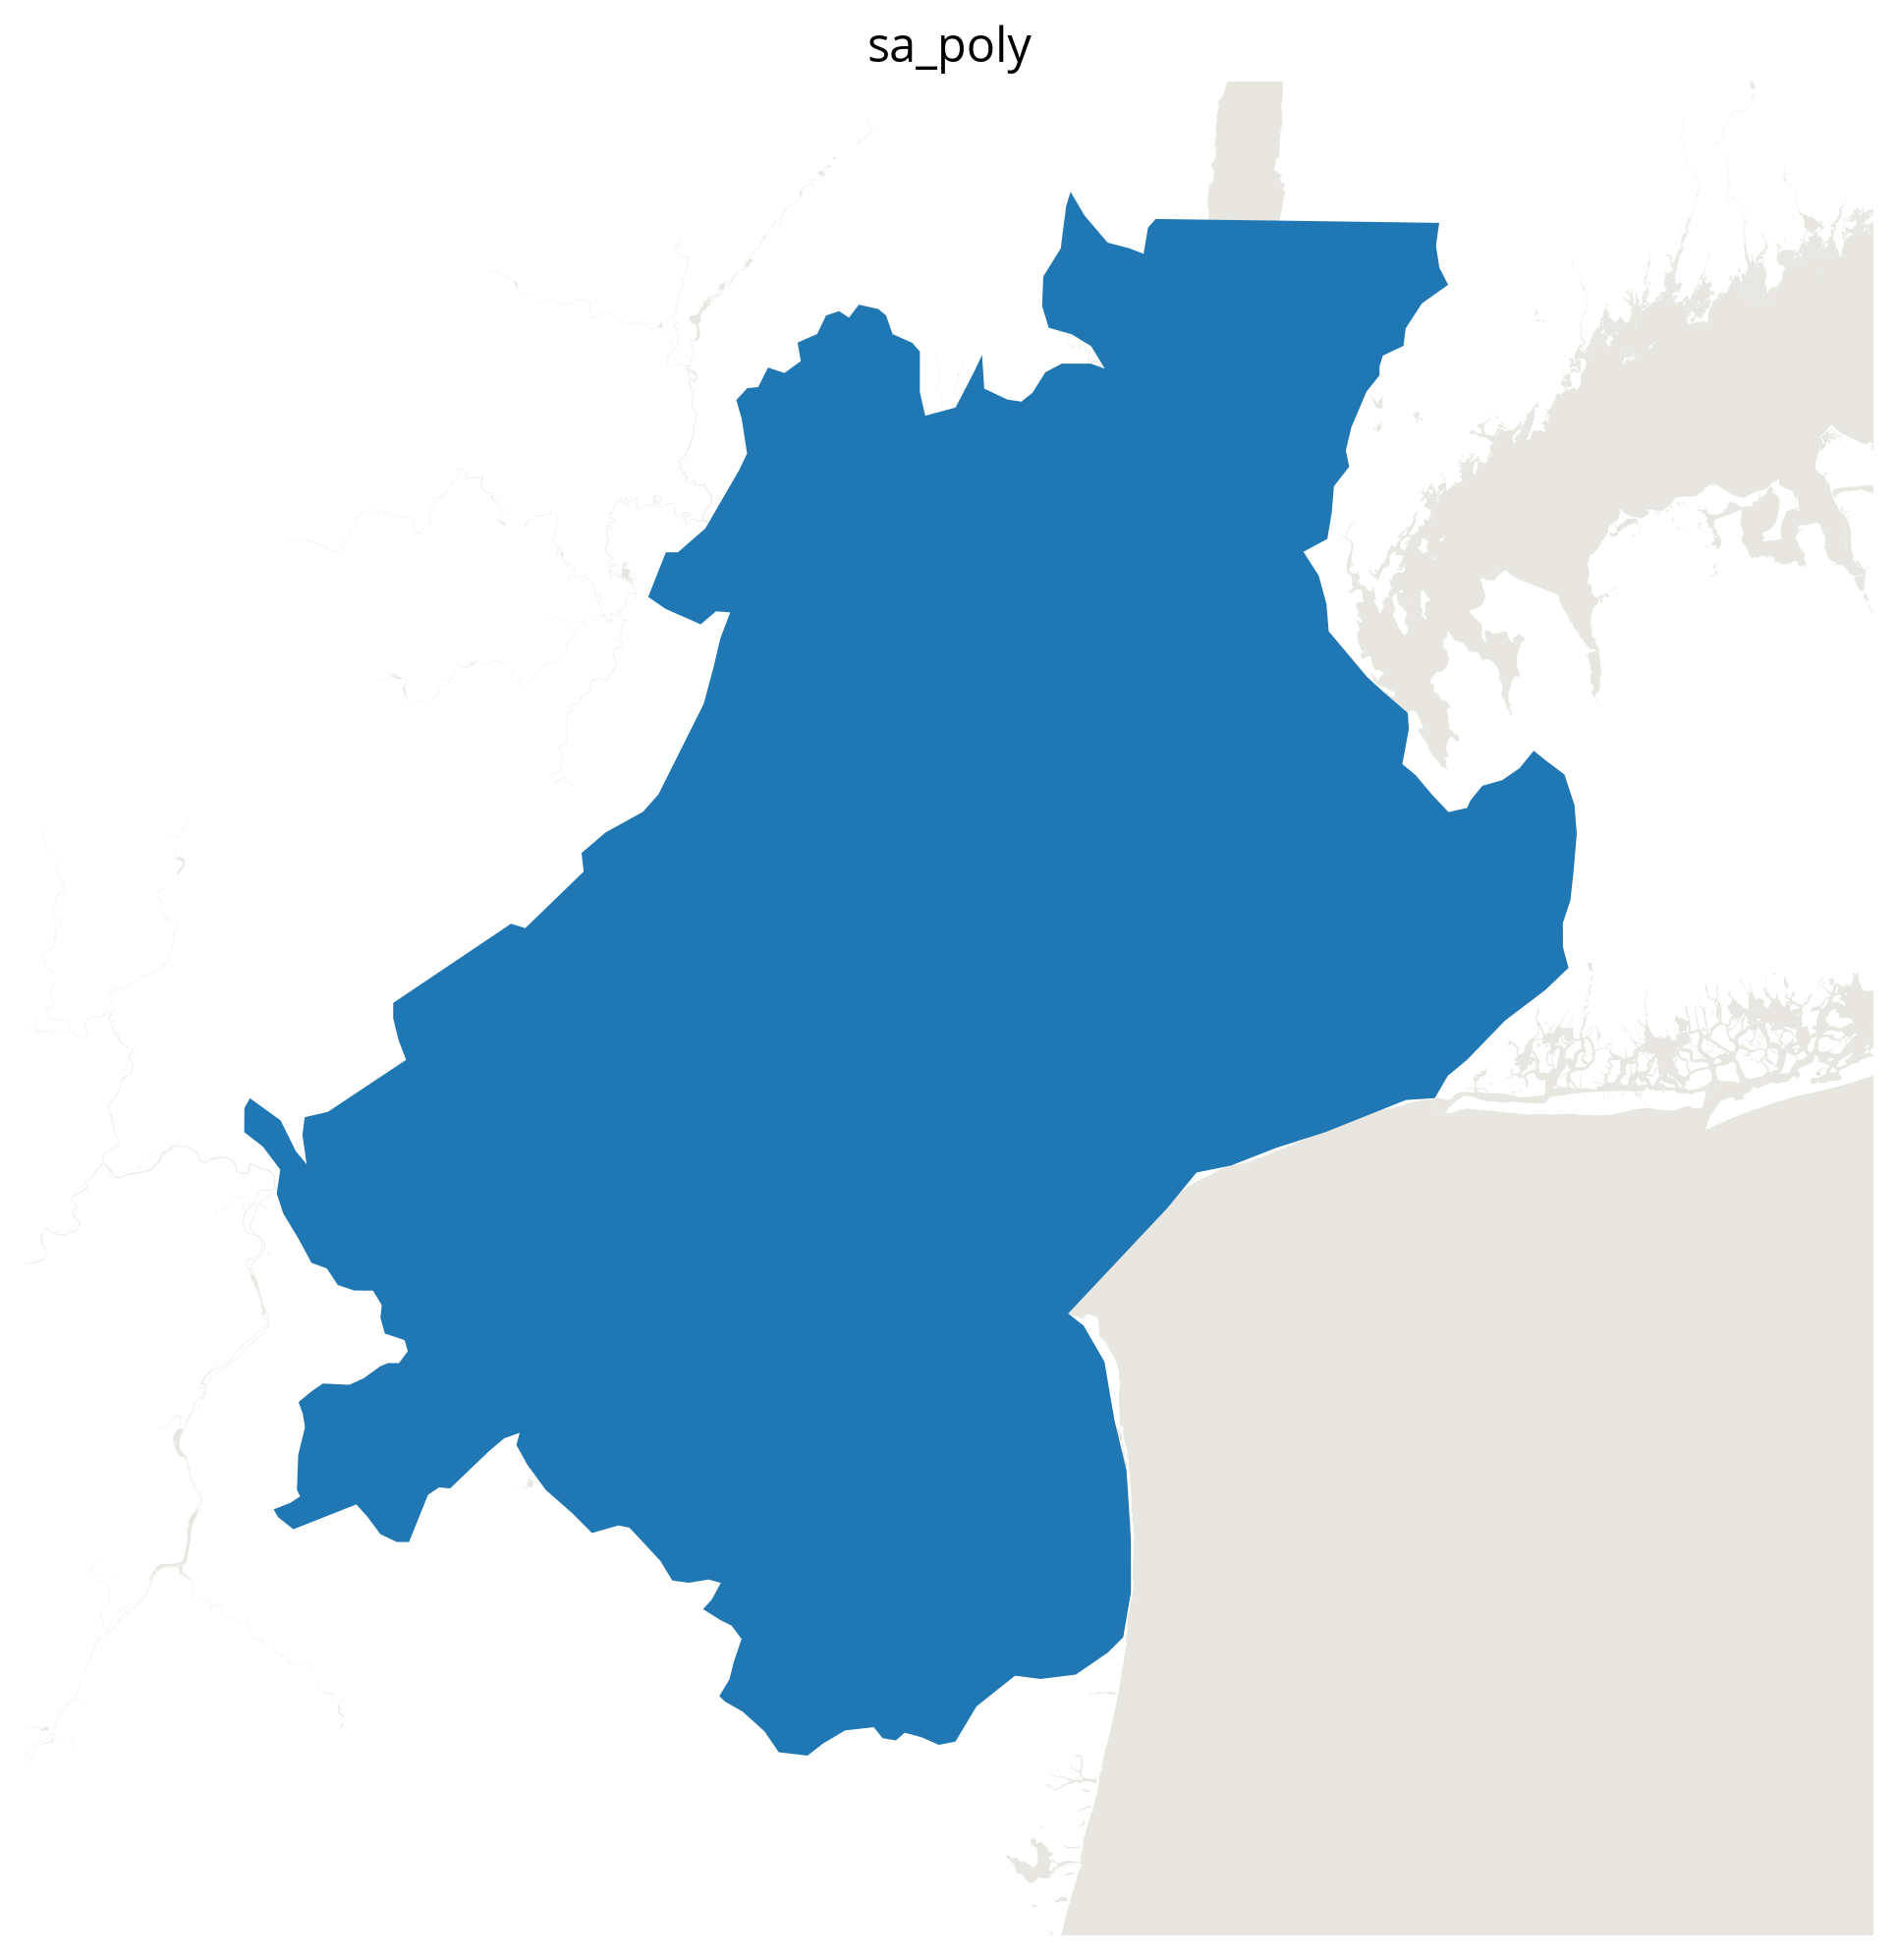

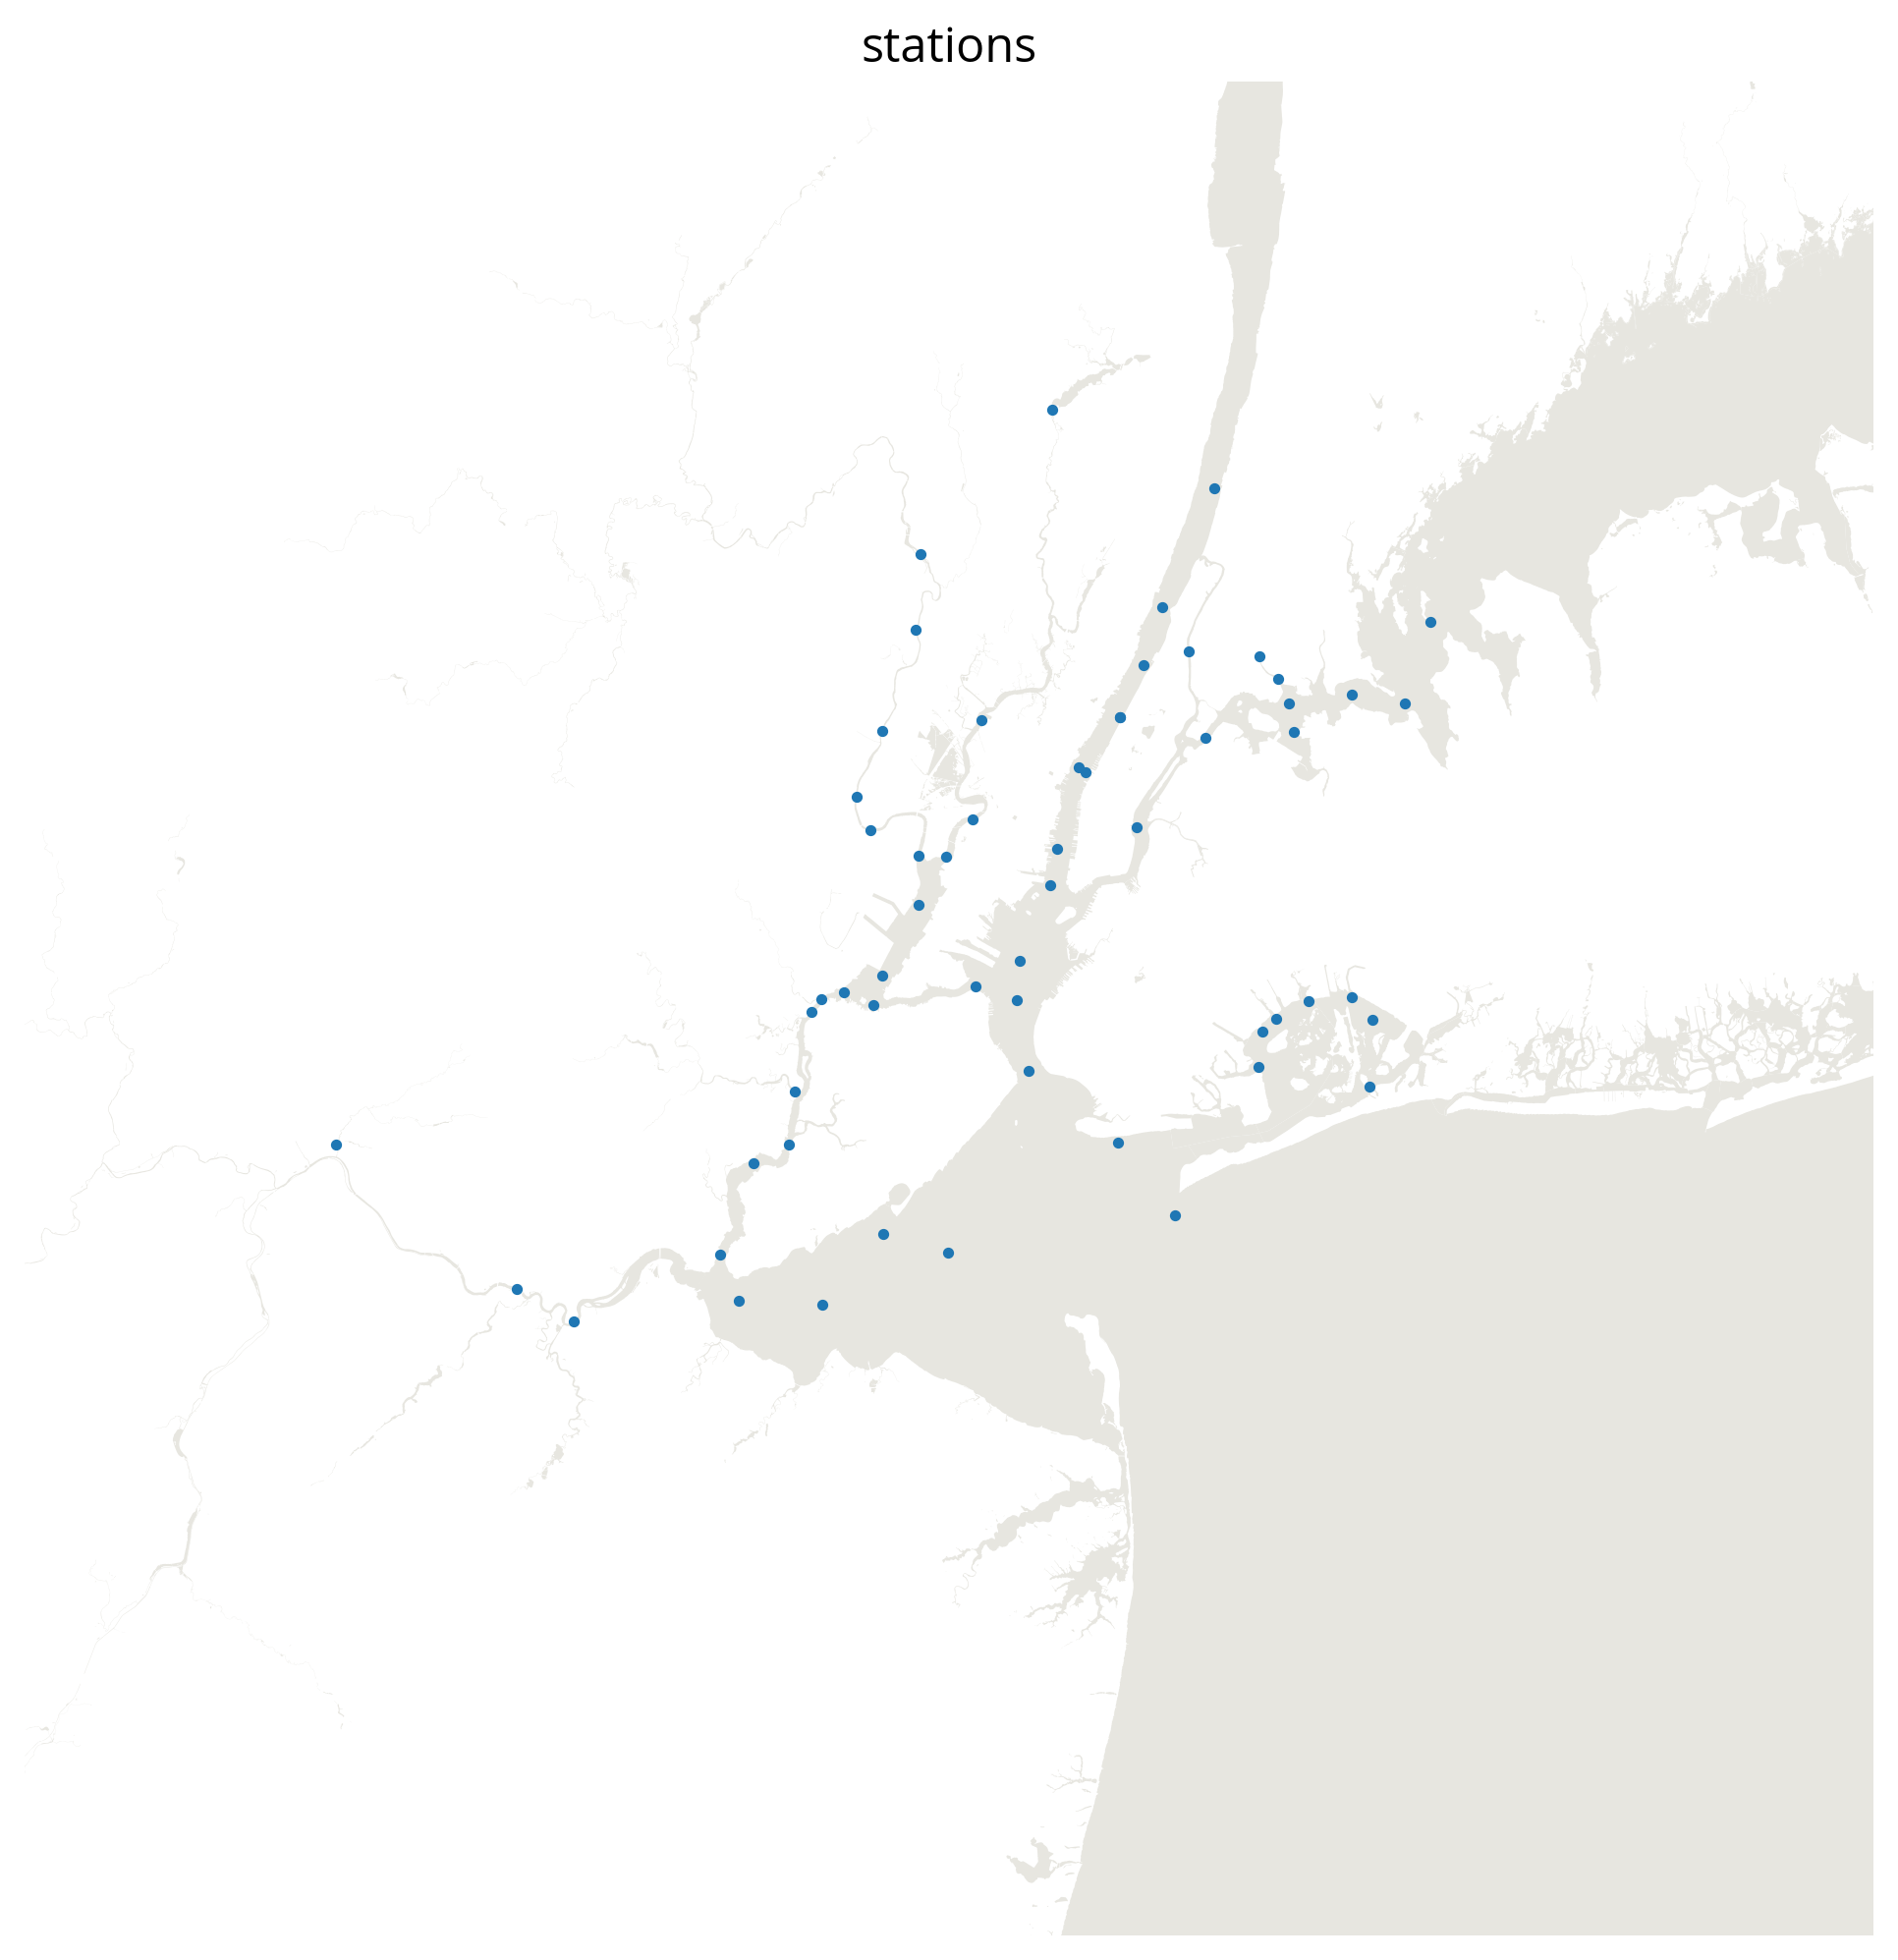

In [363]:
for k, v in data.items():
    gdf = data[k]['gdf']
    fig, ax = plt.subplots(figsize = (10, 10), dpi = 200)
    
    ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
    ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

    watershape.plot(
        ax = ax,
        facecolor = colors['grey1']
    )

    gdf.plot(
        ax = ax,
        markersize = 5
    )

    plt.title(k, fontsize = 12)
    ax.axis('off')
    plt.savefig(f'../img/{k}.png')  
    plt.show()

## Plot as Small Multiples to see all gdfs at once

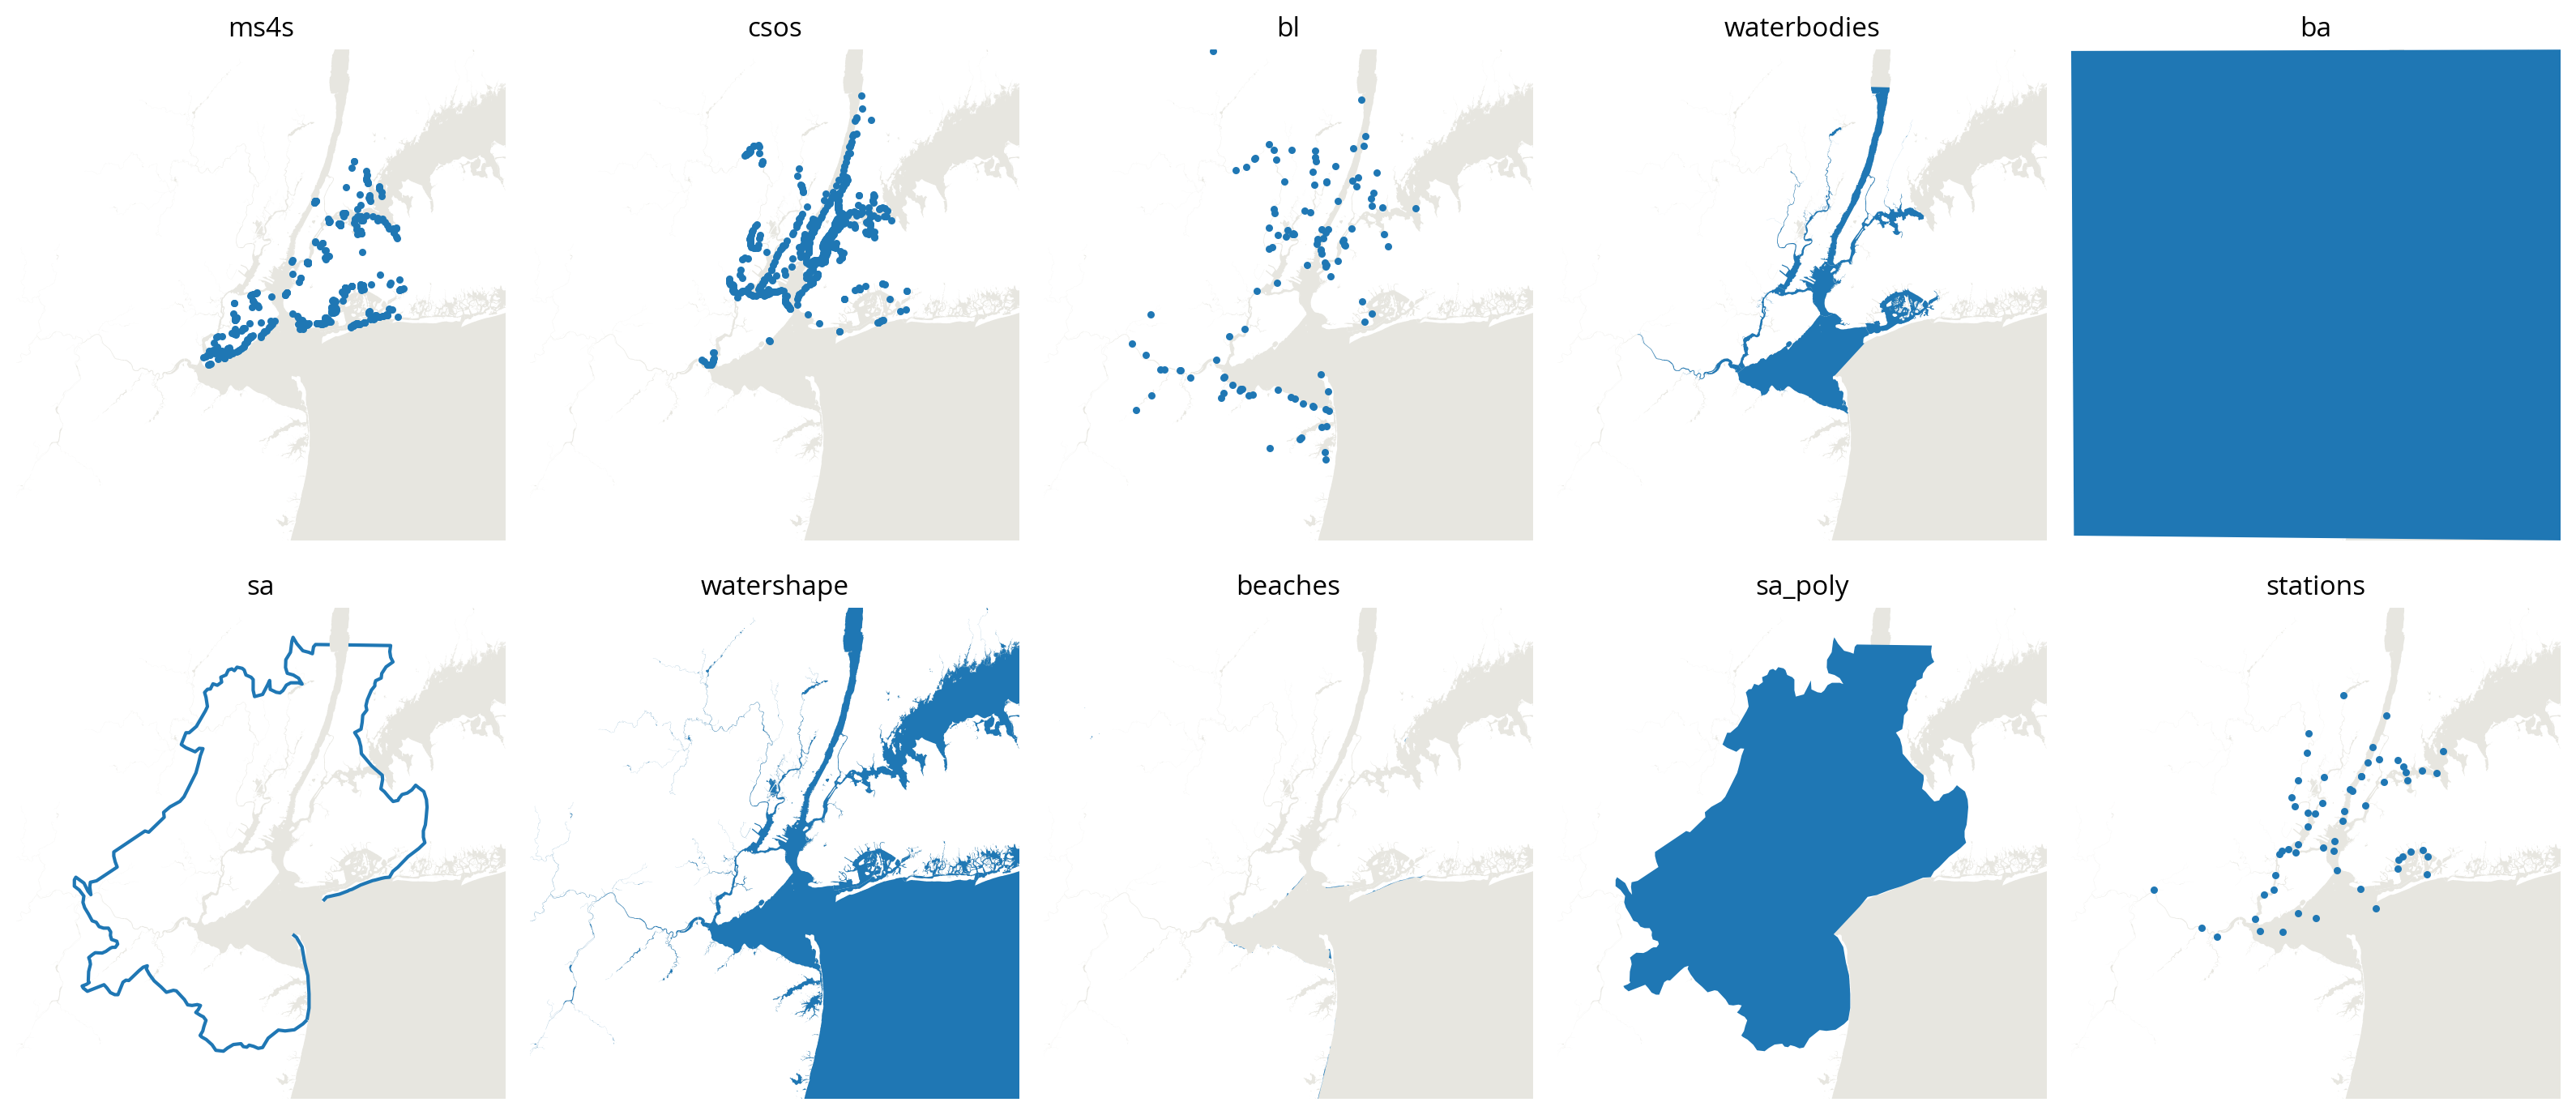

In [448]:
fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (16,8), dpi = 200) 

axes_list = []

for ax_row in ax:
    for ax_col in ax_row:
        axes_list.append(ax_col)
        
for axes, key in zip(axes_list, data.keys()):
    gdf = data[key]['gdf']
    
    axes.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])  # note use axes not ax here
    axes.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])
    
    axes.set_title(key, fontsize = 12)
    axes.axis('off') 
    
    watershape.plot(
        ax = axes,
        facecolor = colors['grey1']
    )
       
    gdf.plot(
        ax = axes,
        markersize = 5,
    )
    
    fig.tight_layout()
    plt.savefig('../img/projectdata_grid.png') 

## Look at pollution sources and recreation areas on one map 
experiment with plot parameters

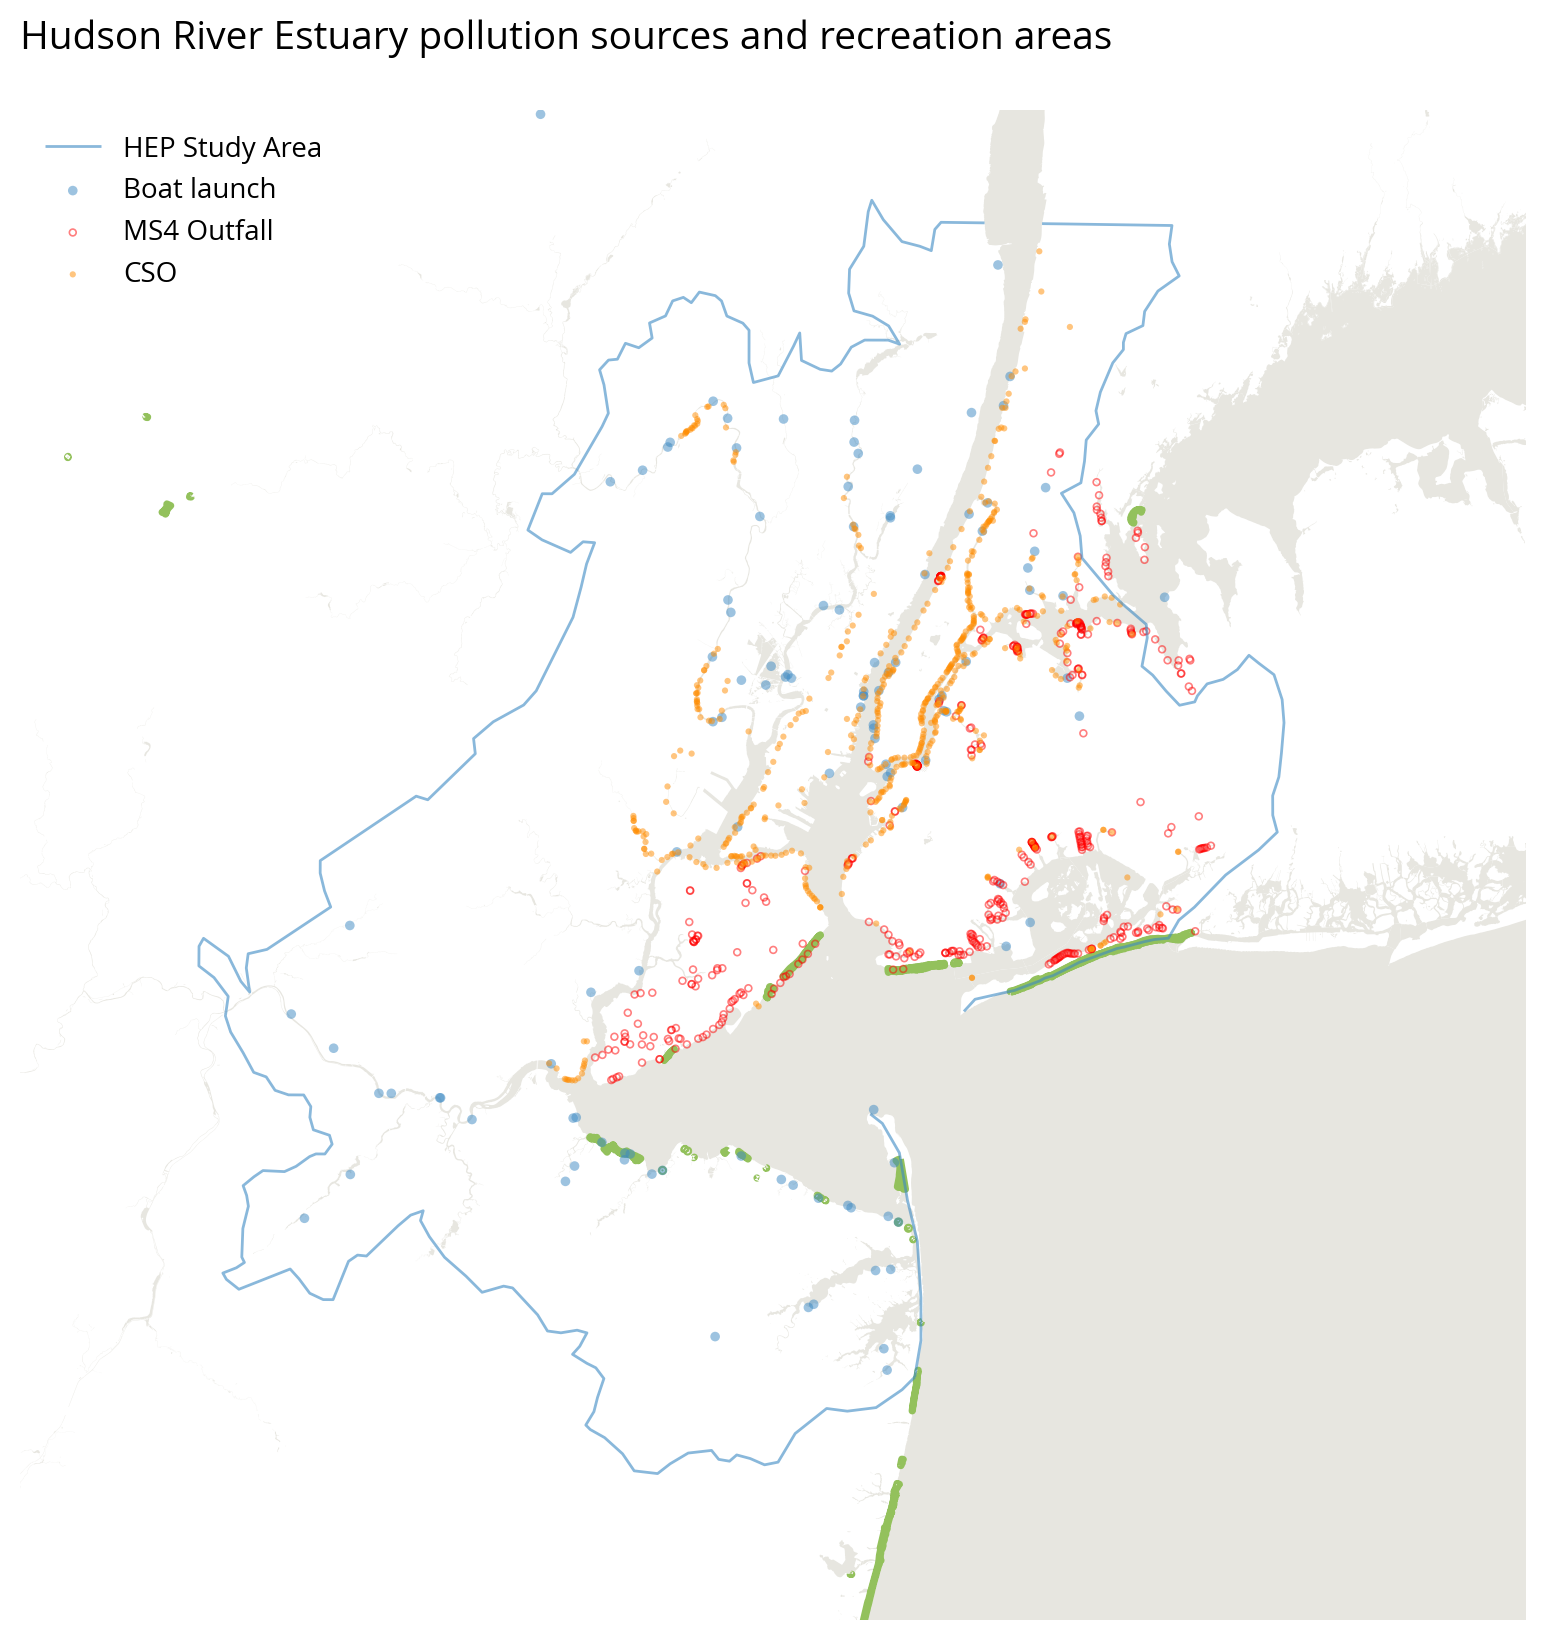

In [434]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 200)

ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

watershape.plot(
    ax = ax,
    color = '#e7e6e0',
)
sa.plot(
    ax = ax,
    edgecolor= colors['wq_bl'],
    alpha = .6,
    linewidth = 1,
    label = 'HEP Study Area',
)
beaches.plot(
    ax = ax,
    facecolor = '#93C15C',
    edgecolor = '#93C15C',
    linewidth = 2.5,
    label = 'Bathing Beach',
)
bl.plot(
    ax = ax,
    facecolor = colors['wq_bl'],
    alpha = .5,
    markersize =12,
    edgecolor ='None',
    label = 'Boat launch',
)
ms4s.plot(
    ax = ax,
    markersize = 6,
#    marker = "^",
    facecolor = 'None',
    edgecolor ='red',
    alpha = .5,
    linewidth =.6,
    legend = True,
    label ='MS4 Outfall',
)
csos.plot(
    ax = ax,
    color = 'darkorange',
    markersize = 5,
    edgecolor ='None',
    alpha = .5,
    label ='CSO'
)

ax.axis('off');
ax.set_title('Hudson River Estuary pollution sources and recreation areas\n',
             fontsize = 14, 
             loc = 'left')
ax.legend(
    loc = 'upper left', 
    frameon = False,
    fontsize = 10,
    )

plt.savefig('../img/WQ_pollution_sources_data.png') 

### Create palette in list form for categorical map
Passing a list to the colors parameter with geopandas works for plotting with custom colors. 
- the list needs to contain the same number of colors as there are features to color
- another option is to add a column to the data with the colors in it

In [367]:
waterbodies['WB_name']

0                                  Lower Bay
1    Bronx River & Western Long Island Sound
2                           Hackensack River
3                         Lower Hudson River
4                 Passaic River & Newark Bay
5                Arthur Kill & Kill van Kull
6                         Upper New York Bay
7                  East River & Harlem River
8                  Jamaica Bay & Tributaries
9                        Lower Raritan River
Name: WB_name, dtype: object

In [368]:
reg_colors = ['#B2CDE8', '#CDB1DB','#93C25C','#88B1DC','#93C25C','#5AA846','#3B89C3','#8A3E99','#A06ABA','#48823A']
#reg_colors = ['#C7C3BB','#B9B3AA','#56524A','#93C15C','#4fa4e3','#A95A9B', '#fcb103','#E3BE3A','#fc5203','#B9B3AA',]    

waterbodies['reg_colors'] = reg_colors

In [370]:
stations['source'].unique()

array(['NYCDEP', 'NJHDG'], dtype=object)

In [371]:
st_color=['#FFC306', '#ED7711']

In [372]:
stations.loc[stations['source'] == 'NYCDEP', 'st_color'] = '#FFC306'
stations.loc[stations['source'] == 'NJHDG', 'st_color'] = '#ED7711'

In [374]:
stations['st_color'].unique()

array(['#FFC306', '#ED7711'], dtype=object)

## Map categorical data: polygons and points
*The legend for waterbody regions works when cmap colors are used but stopped working when a custom palette was introduced.

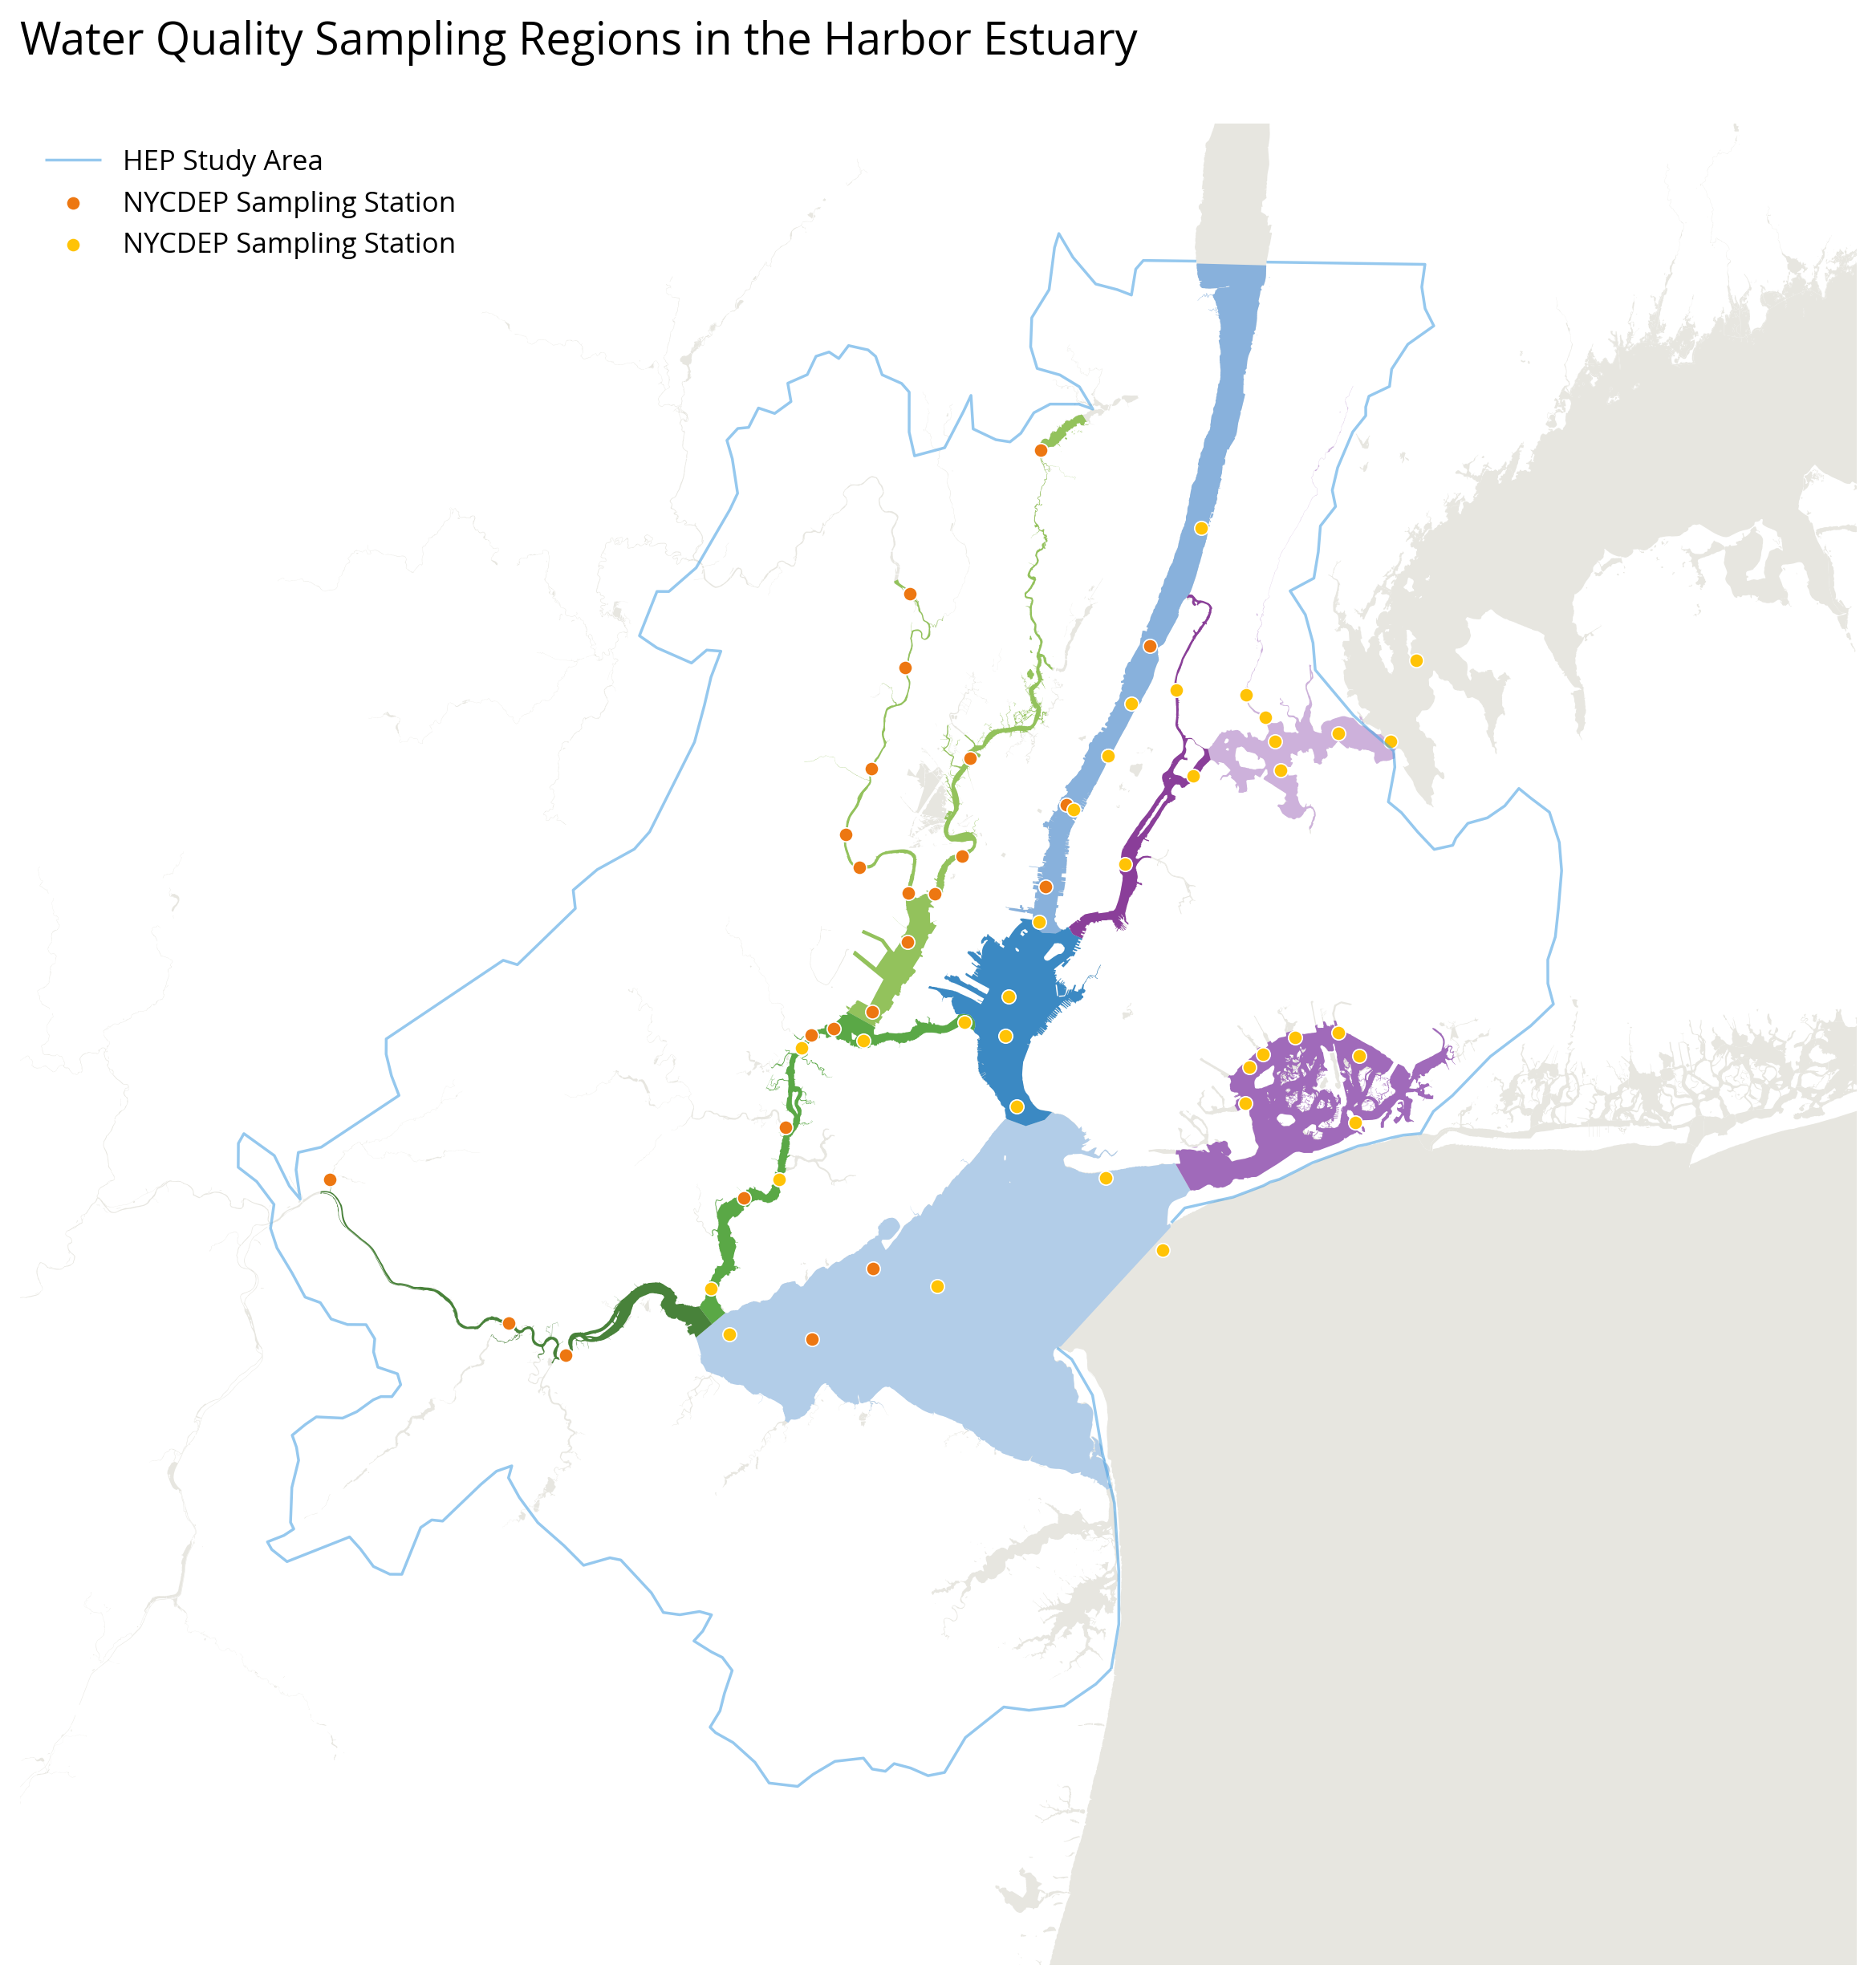

In [450]:
fig, ax = plt.subplots(figsize = (10,10), dpi = 250)

ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

watershape.plot(
    ax = ax,
    color = colors['grey1'],
)
waterbodies.plot(
    #column = 'WB_name',
    categorical = True,
    color = reg_colors,
    legend = True, # not sure why this part of legend does not show
    legend_kwds = {
        'fontsize' : 10,
        'frameon' : False,
        'loc':'upper left'},
    ax = ax
)
sa.plot(
    ax = ax,
    edgecolor = '#4fa4e3',
    alpha = .6,
    linewidth = 1,
    label='HEP Study Area',
)
stations[stations['source'] == 'NJHDG'].plot(
    ax = ax,
    markersize = 25,
    color = '#ED7711',
    edgecolor = 'white',
    linewidth = .5,
    label = 'NYCDEP Sampling Station'
    )
stations[stations['source'] == 'NYCDEP'].plot(
    ax = ax,
    markersize = 25,
    facecolor = '#FFC306',
    edgecolor = 'white',
    linewidth = .5,
    label = 'NYCDEP Sampling Station'    
    )

ax.axis('off');
ax.set_title('Water Quality Sampling Regions in the Harbor Estuary\n',
             fontsize = 16, 
             loc = 'left')
ax.legend(
    loc = 'upper left', 
    frameon = False
    )
fig.tight_layout()
plt.savefig('../img/sampling_regions.png')

# Find pollution sources near recreation areas
### geoprocessing
clip data to study area

In [375]:
beaches_clipped = geopandas.overlay(
    sa_poly, 
    beaches, 
    how = 'intersection',
)

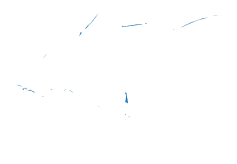

In [399]:
fig, ax = plt.subplots(figsize = (4,4))
beaches_clipped.plot(
    ax = ax
)
ax.axis('off');

In [377]:
  beaches_clipped.to_file(f'../data/processing/HEP_beaches_polygons.shp')

### ** This worked many times before but since recreating virtual environment, this is not wroking below. I can't figure out why. Have I forgotten to import a library?

In [378]:
bl_clipped = geopandas.overlay(
    sa_poly, 
    bl, 
    how = 'intersection',
)

TypeError: overlay only takes GeoDataFrames with (multi)polygon  geometries.

In [44]:
  bl_clipped.to_file(f'../data/processing/HEP_boatlaunches_clipped.shp')

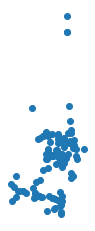

In [445]:
fig, ax = plt.subplots(figsize = (4,4))
bl.plot(ax = ax)
ax.axis('off');

### buffer data to use for selecting polution sources within .5 miles

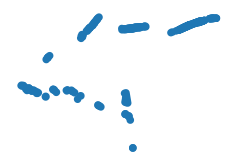

In [444]:
beaches_buffer = beaches_clipped.copy()
beaches_buffer['geometry'] = beaches_buffer.buffer(2600)

fig, ax = plt.subplots(figsize = (4,4))
beaches_buffer.plot(ax = ax)
ax.axis('off');

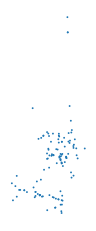

In [443]:
fig, ax = plt.subplots(figsize = (4,4))
# bl_buffer = bl_clipped.copy()
# bl_buffer['geometry'] = bl_clipped.buffer(2600)
# bl_buffer.plot();
# since intersect code above stopped working, I'll use unclipped data for this
bl_buffer = bl.copy()
bl_buffer['geometry'] = bl.buffer(2600)
bl_buffer.plot(ax=ax);
ax.axis('off');

### Select CSOs and MS4 points that are within 1/2 mile of beach and/or boat launch

In [383]:
import geopandas as gpd

In [384]:
beaches_buffer['ms4s']=1
ms4_at_beaches_buffer_sj = gpd.sjoin(ms4s,beaches_buffer, how="left", op='intersects')

In [385]:
ms4s_on_beaches=ms4_at_beaches_buffer_sj[ms4_at_beaches_buffer_sj['ms4s']==1]

In [387]:
ms4s_on_beaches.tail(2)

OBJECTID_left        ID              WATERBODY   OUTFALLTYP FLOATABLES  \
448          449.0  ROC-1202  GRASS HASSOCK CHANNEL  MS4 OUTFALL        Yes   
448          449.0  ROC-1202  GRASS HASSOCK CHANNEL  MS4 OUTFALL        Yes   

    PATHOGENS NITROGEN PHOSPHORUS    BORO TREATMENT_  ... beaches  borough  \
448       Yes      Yes         No  QUEENS   ROCKAWAY  ...    None        Q   
448       Yes      Yes         No  QUEENS   ROCKAWAY  ...    None        Q   

     gispropnum            name     shape_star   shape_stle  \
448        Q163  Rockaway Beach   88043.078064  1228.242815   
448        Q163  Rockaway Beach  197550.987289  1996.955878   

                 system                                            layer  \
448  Q163-ZN07B-BCH0018  geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085   
448  Q163-ZN07B-BCH0013  geo_export_f52600fb-ba6a-4742-bbe4-5e974f82c085   

                                                  path ms4s  
448  /Users/saraeichner/Dropbox/HEP_DataExploration...  1.0  
448  /Users/saraeichner/Dropbox/HEP_DataExploration...  1.0  

[2 rows x 53 columns]

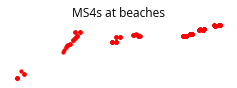

In [440]:
fig, ax = plt.subplots(figsize = (4,4))
ms4s_on_beaches.plot(ax = ax, color = 'red', markersize = 10)
ax.axis('off')
plt.title('MS4s at beaches');

In [391]:
beaches_buffer['csos']=1
csos_at_beaches_buffer_sj_cso = gpd.sjoin(csos,beaches_buffer, how="left", op='intersects')

In [392]:
csos_on_beaches=csos_at_beaches_buffer_sj_cso[csos_at_beaches_buffer_sj_cso['csos']==1]

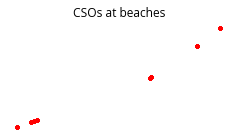

In [439]:
fig, ax = plt.subplots(figsize = (4,4))
csos_on_beaches.plot(ax = ax, color = 'red', markersize = 10)
ax.axis('off');
plt.title('CSOs at beaches');

In [396]:
bl_buffer['ms4']=1
ms4_at_launches_buffer_sj = gpd.sjoin(ms4s,bl_buffer, how="left", op='intersects')

In [397]:
ms4_at_launches=ms4_at_launches_buffer_sj[ms4_at_launches_buffer_sj['ms4']==1]

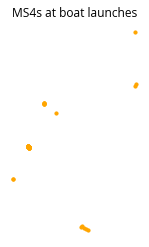

In [423]:
fig, ax = plt.subplots(figsize = (4,4))
ms4_at_launches.plot(
    ax=ax,
    color='orange', 
    markersize = 10,
)
ax.axis('off');
plt.title('MS4s at boat launches');

In [403]:
bl_buffer['csos']=1
csos_in_launches_buffer_sj_cso = gpd.sjoin(csos,bl_buffer, how="left", op='intersects')

In [404]:
csos_inbuffer=csos_in_launches_buffer_sj_cso[csos_in_launches_buffer_sj_cso['csos']==1]

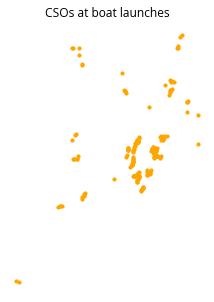

In [424]:
fig, ax = plt.subplots(figsize = (5,5))
csos_inbuffer.plot(
    ax=ax,
    color='orange', 
    markersize = 10)
ax.axis('off');
plt.title('CSOs at boat launches');

## Style data to show findings

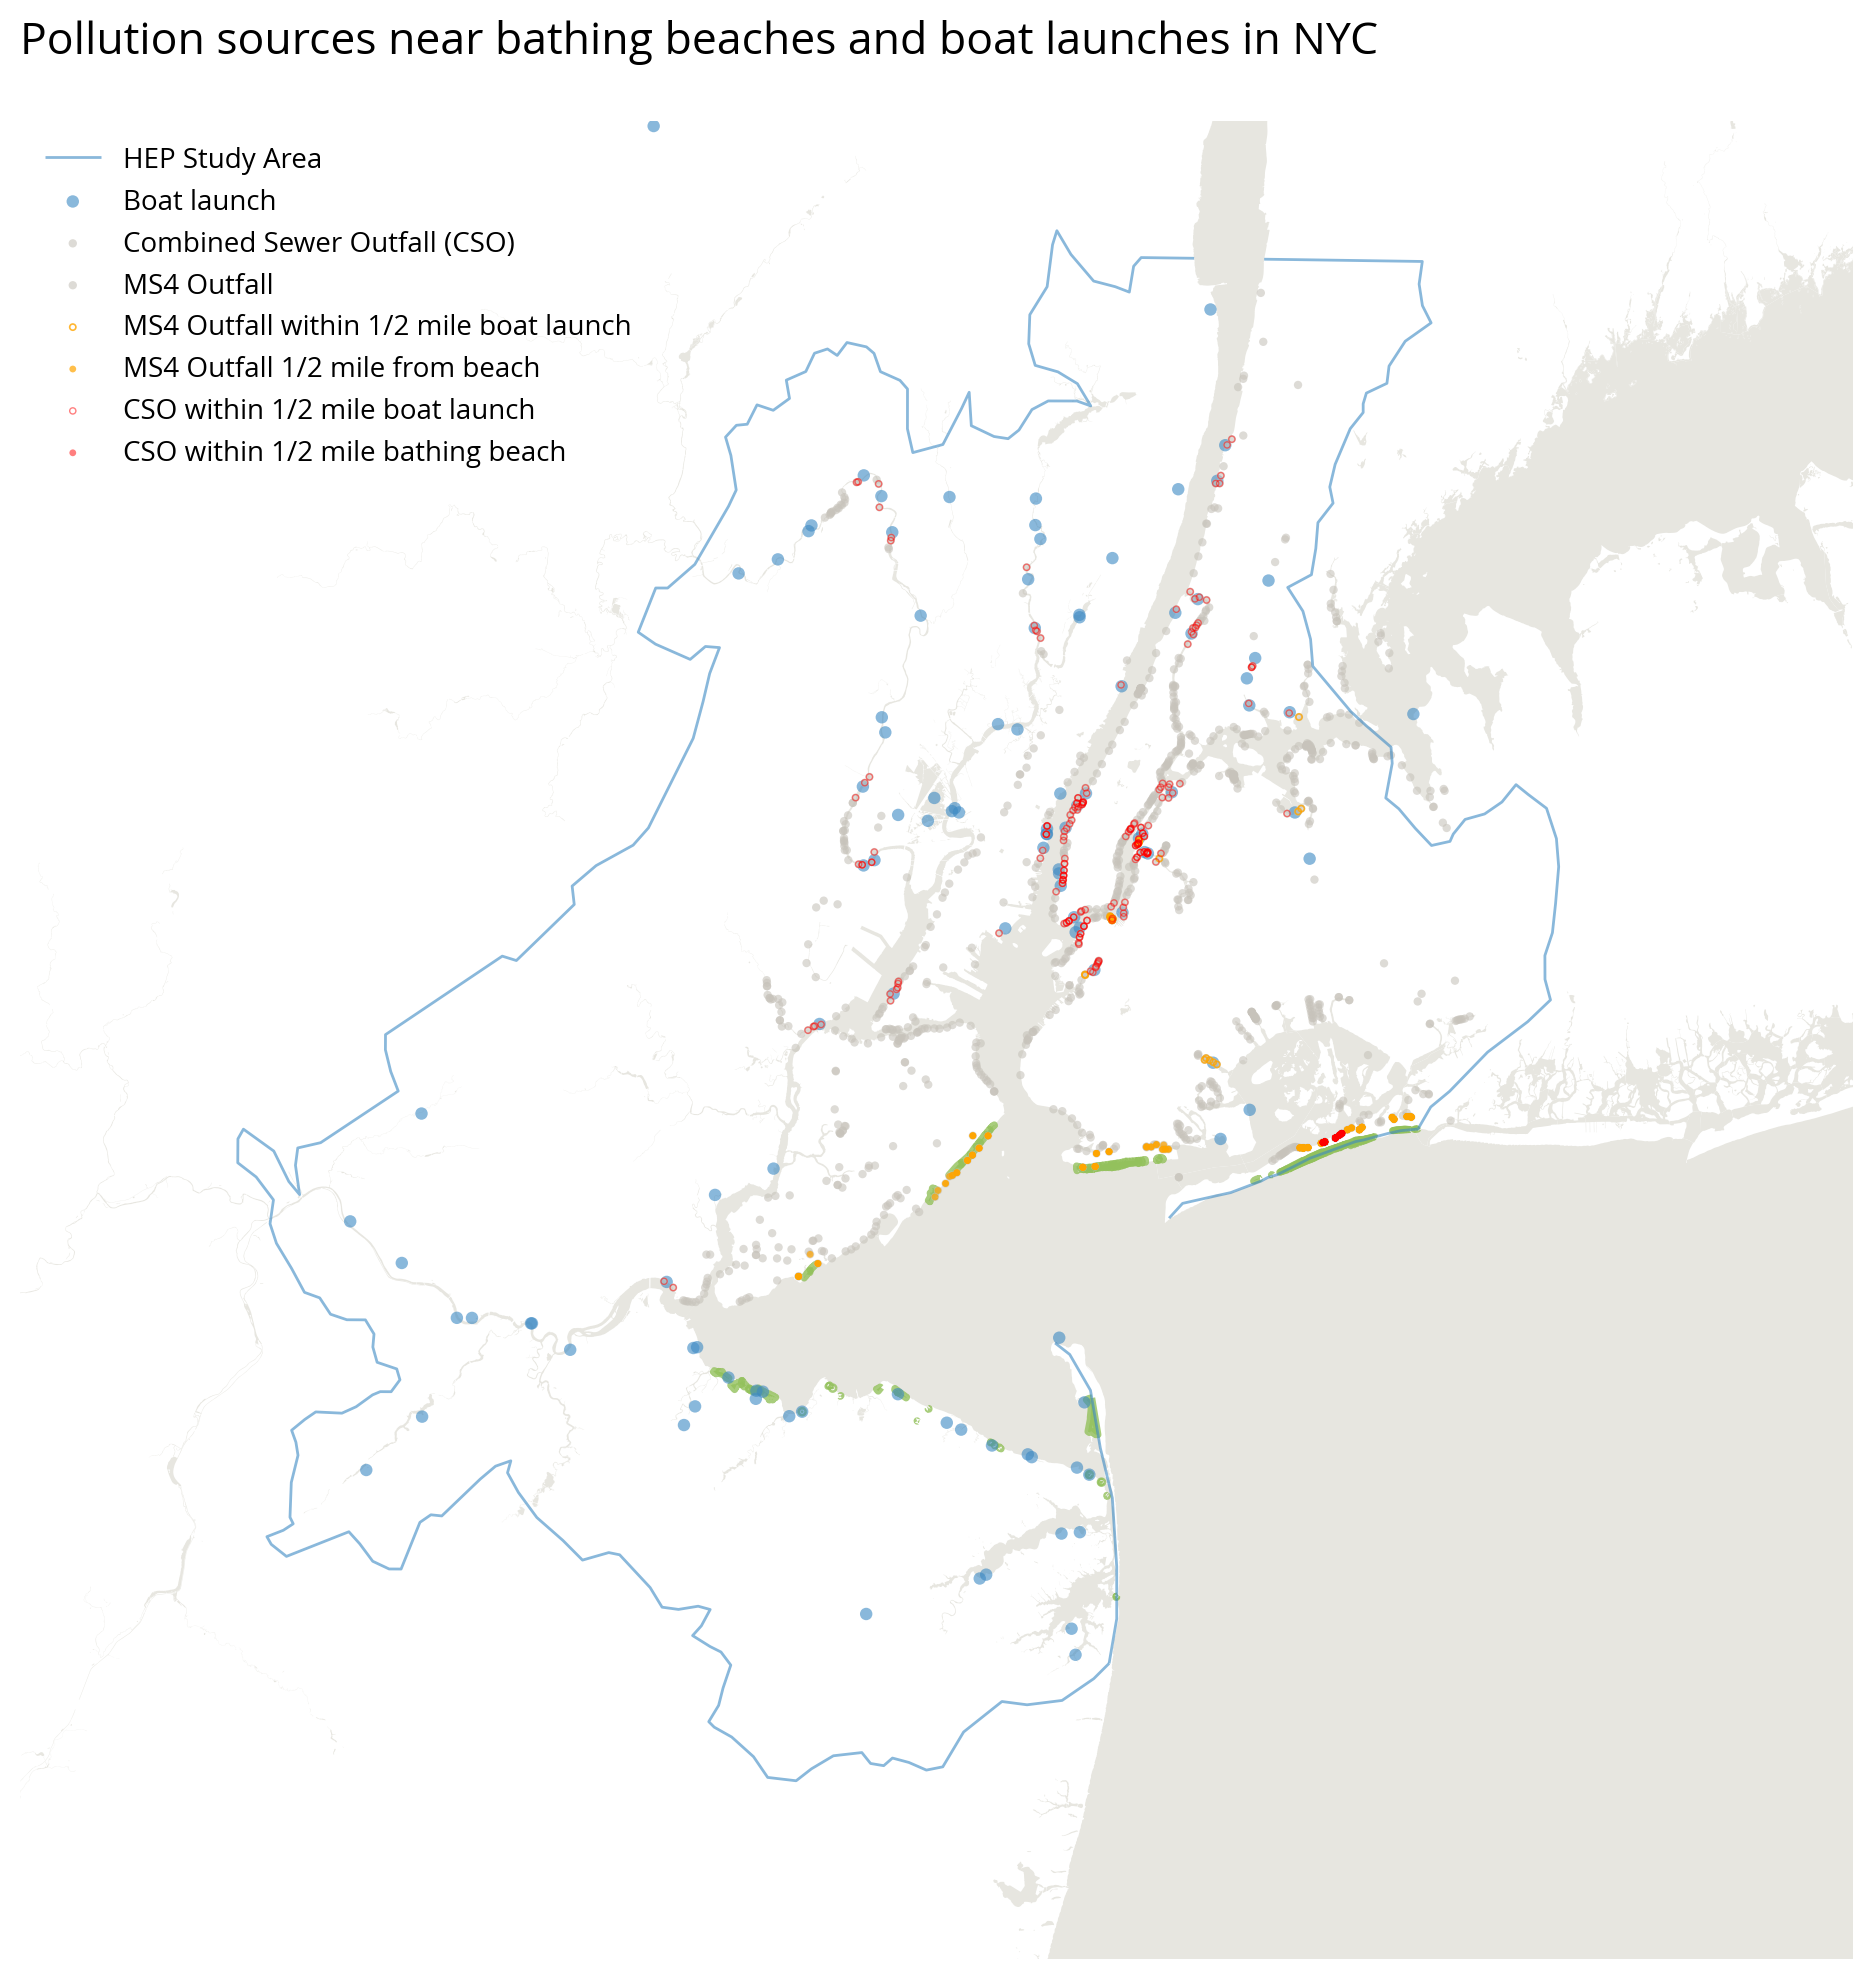

In [451]:
fig, ax = plt.subplots(figsize = (10, 10), dpi = 200)
ax.set_xlim(ba.bounds['minx'][0], ba.bounds['maxx'][0])
ax.set_ylim(ba.bounds['miny'][0], ba.bounds['maxy'][0])

watershape.plot(
    ax = ax,
    color = '#e7e6e0'
),
sa.plot(
    ax = ax,
    edgecolor = colors['wq_bl'],
    alpha = .6,
    linewidth = 1,
    label = 'HEP Study Area',
),

# recreation areas
beaches_clipped.plot(
    ax = ax,
    facecolor = '#93C15C',
    edgecolor = '#93C15C',
    alpha = .8,
    linewidth = 2.5,
    label ='Bathing Beach',
), 
bl.plot(
    ax = ax,
    facecolor = colors['wq_bl'],
    alpha = .6,
    markersize = 20,
    edgecolor = 'None',
    label = 'Boat launch',
)

# pollution sources not near recreation areas
csos.plot(    
    ax = ax,
    markersize = 9,
    alpha = .6,
    color = '#C7C3BB',
    edgecolor ='None',
    legend = True,
    label = 'Combined Sewer Outfall (CSO)',
),
ms4s.plot(
    ax = ax,
    markersize = 9,
    color = '#C7C3BB',
    edgecolor ='None',
    alpha = .6,
    legend = True,
    label = 'MS4 Outfall',
),   

# pollution sources near recreation areas
ms4_at_launches.plot(
    ax = ax,
    markersize = 5,
    facecolor = 'None',
    edgecolor = 'orange',
    linewidth = .6,
    alpha = .8,
    legend = True,
    label ='MS4 Outfall within 1/2 mile boat launch',
),
ms4s_on_beaches.plot(
    ax = ax,
    markersize = 6,    
    facecolor ='orange',
    edgecolor ='None',
    alpha = .7,
    legend = True,
    label ='MS4 Outfall 1/2 mile from beach',
),
csos_inbuffer.plot(
    ax = ax,
    markersize = 5,
    facecolor = 'None',
    edgecolor = 'red',
    linewidth = .5,
    alpha = .5,
    legend = True,
    label = 'CSO within 1/2 mile boat launch'
),
csos_on_beaches.plot(
    ax = ax,
    markersize = 6,
    color = 'red',
    edgecolor ='None',
    alpha = .5,
    legend = True,
    label = 'CSO within 1/2 mile bathing beach',    
)

ax.legend(
    loc = 'upper left', 
    frameon = False, 
    fontsize = 10,
)
ax.set_title(
    'Pollution sources near bathing beaches and boat launches in NYC\n', 
    loc = 'left', 
    fontsize = 16
)
ax.axis('off');
fig.tight_layout()
plt.savefig('../img/polutionsources_recreation_estuary.pdf')
plt.savefig('../img/polutionsources_recreation_estuary.png')